We have been Assigned with---
Consumer Discretionary,Materials,Industrials



# 1.S&P 500 Sector Analysis
This notebook focuses on the analysis of companies within the "Consumer Discretionary," "Materials," and "Industrials" sectors of the S&P 500 index.

## 1.1 Data Prep and EDA

### Setup and Library Imports
Before we start with the data retrieval and analysis, we need to ensure all necessary Python libraries are installed and imported. This setup is crucial for the smooth execution of our data processing tasks.


❌ ❌ Note for Users:❌ ❌
If you see a warning after installing libraries, restart the runtime it will apply changes. Then, re-run the cells to reset the session with updated libraries.








In [ ]:
# Install necessary libraries
!pip install pyomo pandas requests yahoo_fin requests_html --quiet

# Import libraries
import pandas as pd
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from pyomo.opt import SolverFactory, TerminationCondition
from IPython.display import display, clear_output
import yahoo_fin.stock_info as si
import matplotlib.dates as mdates


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.0/201.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.7 MB/s eta 0:00:00
Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


### Fetching S&P 500 Company Data

The first step is to fetch the **S&P 500 company list** dynamically from Wikipedia. To achieve this, we define the `fetch_sp500_data()` function, which:

1. Accesses the Wikipedia page containing the S&P 500 company list.
2. Parses the HTML content to extract the relevant table using the `pandas.read_html()` function.
3. Returns the table as a DataFrame for further processing.

In [ ]:
# Fetch S&P 500 data function
def fetch_sp500_data():
    """Fetches the S&P 500 company list from Wikipedia and returns it as a DataFrame."""
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = requests.get(url).text  # Fetch page content
    df_list = pd.read_html(StringIO(html))  # Parse HTML tables
    return df_list[0]  # Return the first table containing S&P 500 data

### Filtering and Displaying Sector Data

After fetching the S&P 500 company data, we process it to focus on the assigned sectors (**Consumer Discretionary**, **Materials**, and **Industrials**). The steps include:

1. **Converting Dates**: Convert the `Date added` column to a datetime format to allow filtering based on company addition date.
2. **Filtering by Date**: Retain only the companies added to the S&P 500 **on or before January 1, 2017**.
3. **Extracting Relevant Data**: Define a `display_sector_table()` function to filter and display key columns, such as `Symbol`, `Security`, and `GICS Sub-Industry`, for each sector.
4. **Storing Sector Data**: Organize the filtered data for each sector into a dictionary (`sector_tables`) for future use.

In [ ]:
# Fetch the S&P 500 company data
def fetch_sp500_data():
    """Fetches the S&P 500 company list from Wikipedia and returns it as a DataFrame."""
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = requests.get(url).text
    df_list = pd.read_html(StringIO(html))
    return df_list[0]

# Display filtered sector data
def display_sector_table(sp500_df, sector_name):
    """Filters the DataFrame for a specific sector and returns the specified columns."""
    columns_to_display = ['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
                          'Headquarters Location', 'Date added', 'CIK', 'Founded']
    return sp500_df[sp500_df['GICS Sector'] == sector_name][columns_to_display]

# Fetch and process S&P 500 data
sp500_df = fetch_sp500_data()

# Convert 'Date added' to datetime format
sp500_df['Date added'] = pd.to_datetime(sp500_df['Date added'], errors='coerce')

# Filter for companies added on or before January 1, 2017
filtered_df = sp500_df[sp500_df['Date added'] <= '2017-01-01']

# Define assigned sectors
assigned_sectors = ['Consumer Discretionary', 'Materials', 'Industrials']

# Dictionary to store sector-specific tables
sector_tables = {}

# Filter and display data for assigned sectors
for sector in assigned_sectors:
    print(f"\nData for {sector} Sector:")
    sector_table = display_sector_table(filtered_df, sector)  # Filter for the sector
    sector_tables[sector] = sector_table  # Store the sector-specific table
    display(sector_table)  # Display the table

# Display the number of companies in each sector
print("\nNumber of companies per sector:")
print(sp500_df['GICS Sector'].value_counts())



Data for Consumer Discretionary Sector:


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
22,AMZN,Amazon,Consumer Discretionary,Broadline Retail,"Seattle, Washington",2005-11-18,1018724,1994
41,APTV,Aptiv,Consumer Discretionary,Automotive Parts & Equipment,"Dublin, Ireland",2012-12-24,1521332,1994
51,AZO,AutoZone,Consumer Discretionary,Automotive Retail,"Memphis, Tennessee",1997-01-02,866787,1979
61,BBY,Best Buy,Consumer Discretionary,Computer & Electronics Retail,"Richfield, Minnesota",1999-06-29,764478,1966
68,BKNG,Booking Holdings,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","Norwalk, Connecticut",2009-11-06,1075531,1996
69,BWA,BorgWarner,Consumer Discretionary,Automotive Parts & Equipment,"Auburn Hills, Michigan",2011-12-19,908255,1880
86,KMX,CarMax,Consumer Discretionary,Automotive Retail,"Richmond, Virginia",2010-06-28,1170010,1993
87,CCL,Carnival,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","Miami, Florida",1998-12-22,815097,1972
103,CMG,Chipotle Mexican Grill,Consumer Discretionary,Restaurants,"Newport Beach, California",2011-04-28,1058090,1993
138,DRI,Darden Restaurants,Consumer Discretionary,Restaurants,"Orlando, Florida",1995-05-31,940944,1938



Data for Materials Sector:


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
10,APD,Air Products,Materials,Industrial Gases,"Upper Macungie Township, Pennsylvania",1985-04-30,2969,1940
13,ALB,Albemarle Corporation,Materials,Specialty Chemicals,"Charlotte, North Carolina",2016-07-01,915913,1994
53,AVY,Avery Dennison,Materials,Paper & Plastic Packaging Products & Materials,"Mentor, Ohio",1987-12-31,8818,1935
56,BALL,Ball Corporation,Materials,"Metal, Glass & Plastic Containers","Broomfield, Colorado",1984-10-31,9389,1880
98,CF,CF Industries,Materials,Fertilizers & Agricultural Chemicals,"Deerfield, Illinois",2008-08-27,1324404,1946
160,EMN,Eastman Chemical Company,Materials,Specialty Chemicals,"Kingsport, Tennessee",1994-01-01,915389,1920
163,ECL,Ecolab,Materials,Specialty Chemicals,"Saint Paul, Minnesota",1989-01-31,31462,1923
199,FMC,FMC Corporation,Materials,Fertilizers & Agricultural Chemicals,"Philadelphia, Pennsylvania",2009-08-19,37785,1883
206,FCX,Freeport-McMoRan,Materials,Copper,"Phoenix, Arizona",2011-07-01,831259,1912
253,IFF,International Flavors & Fragrances,Materials,Specialty Chemicals,"New York City, New York",1976-03-31,51253,1958 (1889)



Data for Industrials Sector:


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
16,ALLE,Allegion,Industrials,Building Products,"Dublin, Ireland",2013-12-02,1579241,1908
32,AME,Ametek,Industrials,Electrical Components & Equipment,"Berwyn, Pennsylvania",2013-09-23,1037868,1930
50,ADP,Automatic Data Processing,Industrials,Human Resource & Employment Services,"Roseland, New Jersey",1981-03-31,8670,1949
67,BA,Boeing,Industrials,Aerospace & Defense,"Arlington, Virginia",1957-03-04,12927,1916
79,CHRW,C.H. Robinson,Industrials,Air Freight & Logistics,"Eden Prairie, Minnesota",2007-03-02,1043277,1905
90,CAT,Caterpillar Inc.,Industrials,Construction Machinery & Heavy Transportation ...,"Irving, Texas",1957-03-04,18230,1925
108,CTAS,Cintas,Industrials,Diversified Support Services,"Mason, Ohio",2001-03-01,723254,1929
134,CSX,CSX Corporation,Industrials,Rail Transportation,"Jacksonville, Florida",1957-03-04,277948,1980
135,CMI,Cummins,Industrials,Construction Machinery & Heavy Transportation ...,"Columbus, Indiana",1965-03-31,26172,1919



Number of companies per sector:
GICS Sector
Industrials               78
Financials                72
Information Technology    69
Health Care               62
Consumer Discretionary    50
Consumer Staples          38
Utilities                 31
Real Estate               31
Materials                 28
Communication Services    22
Energy                    22
Name: count, dtype: int64


### Extracting Stock Tickers by Sector

In this step, we extract the **stock tickers** for the companies in the assigned sectors. The process involves:

1. **Dynamic Extraction**: For each sector, the `Symbol` column (representing stock tickers) is extracted and stored in a dictionary (`tickers_by_sector`) with sector names as keys.
2. **Combining Tickers**: All tickers are combined into a single list (`tickers_list`) to streamline further data retrieval.
3. **Validation**: A check ensures that the tickers list is not empty, raising an error if no tickers are found.


In [ ]:
# Extract tickers dynamically from filtered sector tables
tickers_by_sector = {}

for sector, table in sector_tables.items():
    # Extract tickers for the current sector
    tickers_by_sector[sector] = table['Symbol'].tolist()

# Combine all tickers into a single list
tickers_list = [ticker for tickers in tickers_by_sector.values() for ticker in tickers]

# Check if tickers_list is populated
if not tickers_list:
    raise ValueError("No stock tickers found for the assigned sectors!")

# Display the grouped tickers by sector
for sector, tickers in tickers_by_sector.items():
    print(f"\nTickers for {sector} Sector:")
    print(tickers)

# Display the combined tickers list
print("\nAll Stock Tickers for Assigned Sectors:")
print(tickers_list)



Tickers for Consumer Discretionary Sector:
['AMZN', 'APTV', 'AZO', 'BBY', 'BKNG', 'BWA', 'KMX', 'CCL', 'CMG', 'DRI', 'DHI', 'EBAY', 'EXPE', 'F', 'GRMN', 'GM', 'GPC', 'HAS', 'HD', 'LEN', 'LKQ', 'LOW', 'MAR', 'MCD', 'MHK', 'NKE', 'ORLY', 'PHM', 'RL', 'ROST', 'RCL', 'SBUX', 'TPR', 'TJX', 'TSCO', 'ULTA', 'WYNN', 'YUM']

Tickers for Materials Sector:
['APD', 'ALB', 'AVY', 'BALL', 'CF', 'EMN', 'ECL', 'FMC', 'FCX', 'IFF', 'IP', 'LIN', 'LYB', 'MLM', 'MOS', 'NEM', 'NUE', 'PPG', 'SHW', 'VMC']

Tickers for Industrials Sector:
['MMM', 'ALLE', 'AME', 'ADP', 'BA', 'CHRW', 'CAT', 'CTAS', 'CSX', 'CMI', 'DE', 'DAL', 'DOV', 'ETN', 'EMR', 'EFX', 'EXPD', 'FAST', 'FDX', 'FTV', 'GE', 'GD', 'HON', 'HWM', 'ITW', 'JBHT', 'J', 'JCI', 'LHX', 'LMT', 'MAS', 'NSC', 'NOC', 'PCAR', 'PH', 'PAYX', 'PNR', 'PWR', 'RTX', 'RSG', 'ROK', 'SNA', 'LUV', 'SWK', 'TXT', 'TT', 'TDG', 'UNP', 'UAL', 'UPS', 'URI', 'VRSK', 'GWW', 'WM', 'XYL']

All Stock Tickers for Assigned Sectors:
['AMZN', 'APTV', 'AZO', 'BBY', 'BKNG', 'BWA', 'KMX'

### Fetching Historical Stock Data

In this step, we retrieve historical stock data for the tickers extracted earlier, covering the period from **January 1, 2017**, to **December 31, 2022**. The process includes:

1. **Defining a Data Retrieval Function**: The `fetch_stock_data()` function fetches daily stock data for each ticker using the Yahoo Finance API. The data includes important fields like adjusted close price, volume, and more.
2. **Data Validation**: Each dataset is checked for completeness, and any ticker with missing or incomplete data is skipped.
3. **Data Organization**: The fetched stock data is grouped by sector and stored in a dictionary (`stock_data_by_sector`), with sector names as keys.
4. **API Rate Limit Management**: A delay is introduced between requests to prevent exceeding API rate limits.

In [ ]:
# Define the date range and interval
start_date = '2017-01-01'
end_date = '2022-12-31'
interval = '1d'

# Initialize a dictionary to store stock data by sector
stock_data_by_sector = {sector: {} for sector in tickers_by_sector.keys()}

# Function to fetch stock data
def fetch_stock_data(ticker):
    """Fetches daily stock data for a given ticker using yahoo_fin."""
    try:
        # Fetch stock data
        stock = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')

        # Validate the data
        if stock.empty or stock.isnull().sum().sum() > 0:
            return None

        return stock
    except Exception:
        return None

# Fetch data for each ticker grouped by sector
for sector, tickers in tickers_by_sector.items():
    for ticker in tickers:
        # Update display dynamically
        display_output = f"Fetching data for {ticker} in {sector} sector..."
        display(display_output)
        stock = fetch_stock_data(ticker)
        clear_output(wait=True)  # Clear the message dynamically

        if stock is not None:
            stock_data_by_sector[sector][ticker] = stock  # Store valid stock data by sector
        time.sleep(1)  # Avoid hitting API rate limits

# Display successfully fetched tickers grouped by sector
for sector, stocks in stock_data_by_sector.items():
    print(f"\nSuccessfully fetched data for {sector} sector:")
    print(list(stocks.keys()))

    # fetching the data
    for ticker, data in stocks.items():
        print(f"\nStock data for {ticker} in {sector} sector:")
        print(data.head())


Successfully fetched data for Consumer Discretionary sector:
['AMZN', 'APTV', 'AZO', 'BBY', 'BKNG', 'BWA', 'KMX', 'CCL', 'CMG', 'DRI', 'DHI', 'EBAY', 'EXPE', 'F', 'GRMN', 'GM', 'GPC', 'HAS', 'HD', 'LEN', 'LKQ', 'LOW', 'MAR', 'MCD', 'MHK', 'NKE', 'ORLY', 'PHM', 'RL', 'ROST', 'RCL', 'SBUX', 'TPR', 'TJX', 'TSCO', 'ULTA', 'WYNN', 'YUM']

Stock data for AMZN in Consumer Discretionary sector:
                 open       high        low      close   adjclose     volume  \
2017-01-03  37.896000  37.938000  37.384998  37.683498  37.683498   70422000   
2017-01-04  37.919498  37.984001  37.709999  37.859001  37.859001   50210000   
2017-01-05  38.077499  39.119999  38.013000  39.022499  39.022499  116602000   
2017-01-06  39.118000  39.972000  38.924000  39.799500  39.799500  119724000   
2017-01-09  39.900002  40.088501  39.588501  39.846001  39.846001   68922000   

           ticker  
2017-01-03   AMZN  
2017-01-04   AMZN  
2017-01-05   AMZN  
2017-01-06   AMZN  
2017-01-09   AMZN  

Stock d

### Extracting Adjusted Close Prices

Now that we have fetched the stock data, we extract the **adjusted close prices**, which are critical for calculating stock returns. The adjusted close price reflects the true value of a stock by accounting for events like dividends and stock splits.

For each sector, we loop through the stocks and extract their adjusted close prices into a single DataFrame, with the stock tickers as column names. If a stock is missing `adjclose` data, it is skipped to maintain the quality of the dataset.

These sector-specific DataFrames of adjusted close prices will be used in the next steps for return calculations and further analysis.


In [ ]:
# Dictionary to store adjusted close prices by sector
prep_data_by_sector = {}

# Loop through each sector and extract 'adjclose' data
for sector, stocks in stock_data_by_sector.items():
    print(f"\nProcessing sector: {sector}")
    sector_data = pd.DataFrame()  # Initialize a DataFrame for the current sector
    for ticker, data in stocks.items():
        if 'adjclose' in data.columns:
            # Add the 'adjclose' column to the sector DataFrame with the ticker as the column name
            sector_data[ticker] = data['adjclose']
        else:
            print(f"'adjclose' not found for {ticker}. Skipping...")

    # Store the sector-specific DataFrame
    prep_data_by_sector[sector] = sector_data

    # Display the combined DataFrame for the current sector
    print(f"\nAdjusted Close Prices for {sector} sector:")
    print(sector_data.head())



Processing sector: Consumer Discretionary

Adjusted Close Prices for Consumer Discretionary sector:
                 AMZN       APTV         AZO        BBY         BKNG  \
2017-01-03  37.683498  54.869354  791.460022  33.117210  1467.011719   
2017-01-04  37.859001  56.900352  793.039978  33.899437  1476.662354   
2017-01-05  39.022499  56.551018  792.000000  33.024269  1492.954956   
2017-01-06  39.799500  56.193558  792.909973  33.124958  1509.704468   
2017-01-09  39.846001  55.291798  790.340027  33.566418  1518.709717   

                  BWA        KMX        CCL     CMG        DRI  ...  \
2017-01-03  31.186970  64.820000  46.789993  7.4954  57.606472  ...   
2017-01-04  31.770697  66.760002  47.400211  7.6372  57.630463  ...   
2017-01-05  31.731783  66.379997  48.198887  7.8378  57.822327  ...   
2017-01-06  31.988640  65.400002  48.145058  7.9688  57.645084  ...   
2017-01-09  31.770697  65.190002  48.180943  7.9012  57.653133  ...   

                   RL       ROST       

### Calculating Daily Percentage Returns

With the adjusted close prices prepared, we now calculate the **daily percentage returns** for each stock. Returns are a key metric for understanding stock performance over time.

For each sector, we:
1. Loop through the stocks and calculate the daily percentage change (`pct_change`) for each stock’s adjusted close price.
2. Remove any rows with missing values created during the calculation process.
3. Filter the data to ensure it falls within the desired date range (**January 1, 2017**, to **December 31, 2022**).


In [ ]:
# Dictionary to store daily percentage returns by sector
return_data_by_sector = {}

# Loop through each sector to calculate percentage returns
for sector, sector_data in prep_data_by_sector.items():
    print(f"\nCalculating returns for {sector} sector...")
    return_data = pd.DataFrame()  # Initialize a DataFrame for the current sector

    # Calculate percentage change (returns) for each ticker
    for ticker in sector_data.columns:
        return_data[ticker] = sector_data[ticker].pct_change()

    # Drop rows with NA values (caused by pct_change)
    return_data.dropna(inplace=True)

    # Ensure only the data within the desired range is used for returns calculation
    return_data = return_data[(return_data.index >= '2017-01-01') & (return_data.index <= '2022-12-31')]

    # Store the sector-specific return DataFrame
    return_data_by_sector[sector] = return_data

    # Display the return DataFrame for the current sector
    print(f"\nReturns for {sector} sector:")
    print(return_data.head())



Calculating returns for Consumer Discretionary sector...

Returns for Consumer Discretionary sector:
                AMZN      APTV       AZO       BBY      BKNG       BWA  \
2017-01-04  0.004657  0.037015  0.001996  0.023620  0.006578  0.018717   
2017-01-05  0.030732 -0.006139 -0.001311 -0.025817  0.011033 -0.001225   
2017-01-06  0.019912 -0.006321  0.001149  0.003049  0.011219  0.008095   
2017-01-09  0.001168 -0.016047 -0.003241  0.013327  0.005965 -0.006813   
2017-01-10 -0.001280  0.035410  0.004226  0.011998  0.003668 -0.001225   

                 KMX       CCL       CMG       DRI  ...        RL      ROST  \
2017-01-04  0.029929  0.013042  0.018918  0.000416  ... -0.000110  0.014327   
2017-01-05 -0.005692  0.016850  0.026266  0.003329  ... -0.017325 -0.012922   
2017-01-06 -0.014763 -0.001117  0.016714 -0.003065  ... -0.005278 -0.005785   
2017-01-09 -0.003211  0.000745 -0.008483  0.000140  ... -0.015015  0.002143   
2017-01-10  0.007516  0.010430  0.049157  0.009642  ...  0

## 1.2 Selecting Top 3 Stocks by Cumulative Returns

In this step, we identify the **top 3 performing stocks** in each sector based on their cumulative returns over the period **2017–2022**. This ensures that only the most profitable stocks are selected for portfolio consideration.

For each sector, we:
1. Calculate the **cumulative return** for each stock by compounding the daily returns.
2. Store the cumulative returns in a DataFrame and sort them in descending order.
3. Select the top 3 stocks with the highest cumulative returns and store them in a dictionary (`top_stocks_by_sector`).


In [ ]:
# Dictionary to store top 3 stocks by sector based on cumulative returns
top_stocks_by_sector = {}

# Loop through each sector to calculate cumulative returns and select top 3
for sector, return_data in return_data_by_sector.items():
    print(f"\nSelecting top 3 stocks for {sector} sector...")

    # Calculate cumulative returns for each stock
    cumulative_returns = {}
    for ticker in return_data.columns:
        # Calculate cumulative return
        cumulative_return = (return_data[ticker] + 1).prod() - 1  # (1 + daily return).prod() - 1
        cumulative_returns[ticker] = cumulative_return

    # Create a DataFrame of cumulative returns for sorting
    cumulative_returns_df = pd.DataFrame(list(cumulative_returns.items()), columns=['Ticker', 'Cumulative Return'])

    # Sort by cumulative return in descending order and select the top 3
    top_stocks = cumulative_returns_df.sort_values(by='Cumulative Return', ascending=False).head(3)

    # Store the result for the sector
    top_stocks_by_sector[sector] = top_stocks

    # Display the top 3 stocks for the sector
    print(f"\nTop 3 stocks for {sector} sector:")
    print(top_stocks)

    # Initialize a dictionary to store stock data for the selected top 3 stocks in the current sector
    sector_stock_data = {}



Selecting top 3 stocks for Consumer Discretionary sector...

Top 3 stocks for Consumer Discretionary sector:
   Ticker  Cumulative Return
8     CMG           2.702244
10    DHI           2.470866
34   TSCO           2.236216

Selecting top 3 stocks for Materials sector...

Top 3 stocks for Materials sector:
   Ticker  Cumulative Return
4      CF           2.165511
11    LIN           2.115057
8     FCX           1.913830

Selecting top 3 stocks for Industrials sector...

Top 3 stocks for Industrials sector:
   Ticker  Cumulative Return
7    CTAS           3.675613
10     DE           3.538050
37    PWR           3.143960


## 1.3 Visualizing Cumulative Returns for Top Stocks

We plot the **cumulative percentage growth** for the top 3 stocks in each sector to visualize their performance over time. For each stock, we calculate its daily percentage returns, then compound them to show the cumulative growth from **2017 to 2022**.

Each plot represents one sector, with the top 3 stocks displayed as separate lines. The x-axis shows the date, and the y-axis shows the cumulative growth in percentage. Legends and labels are included to make the plots clear and easy to interpret.

These visualizations provide a clear picture of how the best-performing stocks in each sector have grown during the selected period.



Plotting cumulative returns for Consumer Discretionary sector...


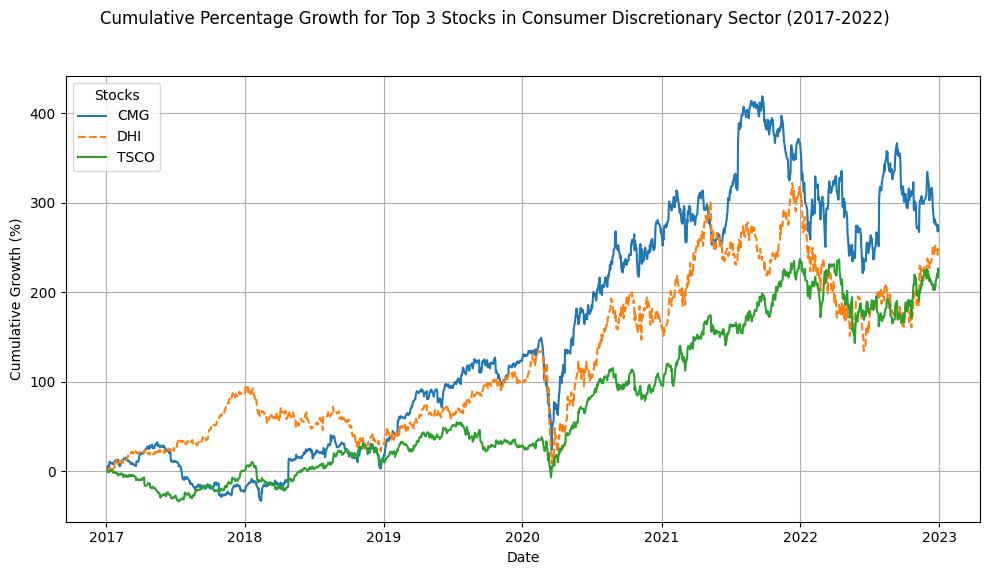


Plotting cumulative returns for Materials sector...


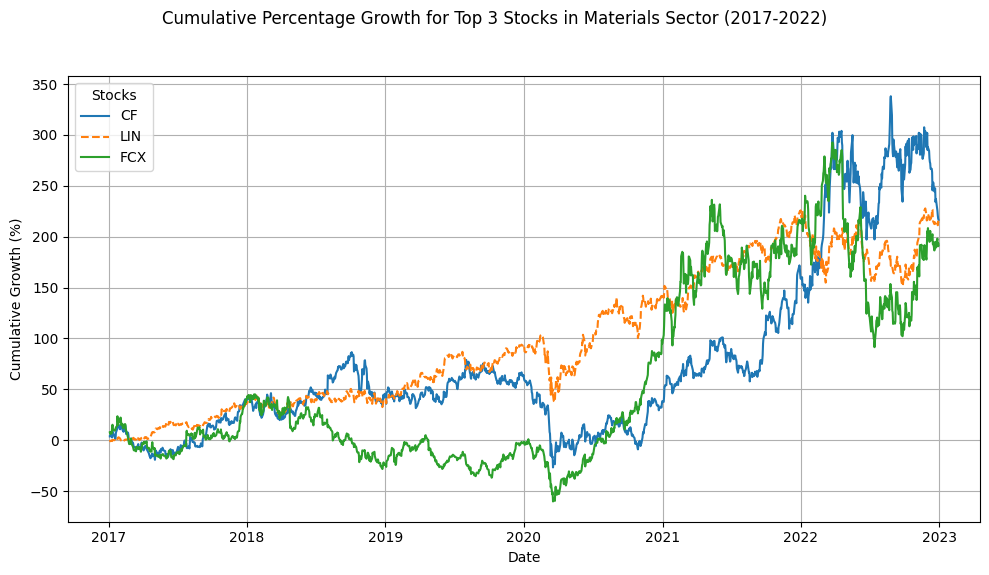


Plotting cumulative returns for Industrials sector...


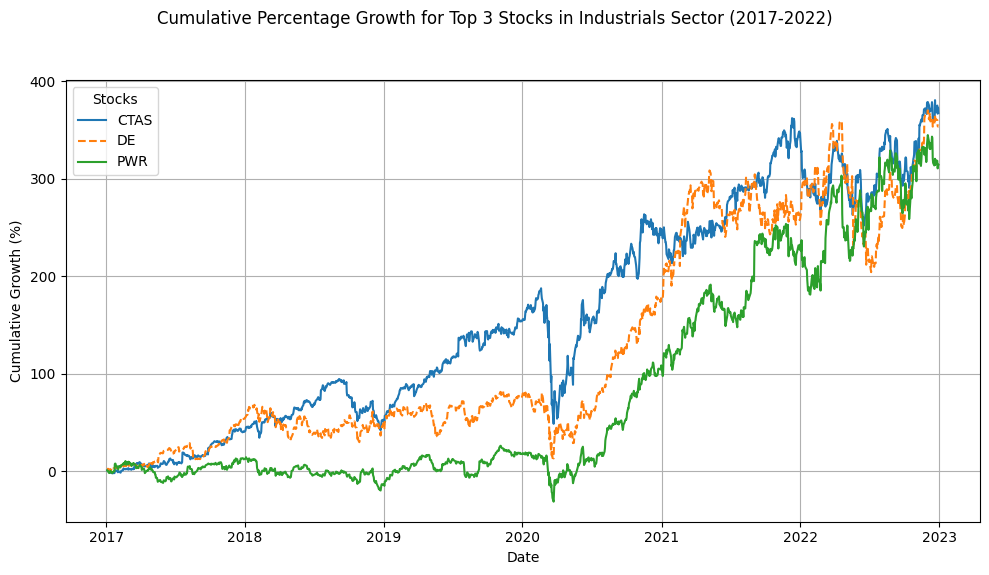

In [ ]:
# Loop through each sector to plot cumulative returns for top 3 stocks
for sector, top_stocks in top_stocks_by_sector.items():
    print(f"\nPlotting cumulative returns for {sector} sector...")

    # Create a figure for the sector's cumulative return plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size for a single plot per sector
    fig.suptitle(f"Cumulative Percentage Growth for Top 3 Stocks in {sector} Sector (2017-2022)")

    # Loop through the top 3 stocks for the current sector and plot cumulative percentage growth
    for i, ticker in enumerate(top_stocks['Ticker']):
        # Get the adjusted close prices for the ticker in this sector
        prices = prep_data_by_sector[sector][ticker]

        # Calculate daily percentage returns
        daily_returns = prices.pct_change()  # Percentage change

        # Calculate cumulative percentage growth
        cumulative_growth = (1 + daily_returns).cumprod() * 100 - 100

        # Plot the cumulative percentage growth for each stock
        ax.plot(cumulative_growth, label=ticker, linestyle='-' if i % 2 == 0 else '--')

    # Set plot labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Growth (%)')
    ax.legend(title="Stocks")
    ax.grid(True)

    # Display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## 1.4 Discussing the Time-Series Visualizations for Each Sector

# **Consumer Discretionary Sector**

The Consumer Discretionary sector visualization displays the daily returns for the top 3 stocks: CMG (Chipotle Mexican Grill), DHI (D.R. Horton), and TSCO (Tractor Supply) from January 1, 2017 to December 31, 2022.

* **CMG (Chipotle)**: The daily returns for CMG show considerable volatility, with noticeable peaks and valleys, especially around 2020. This period of sharp fluctuations likely corresponds to the significant market impact caused by the COVID-19 pandemic, particularly the disruption in the restaurant and foodservice sectors.

* **DHI (D.R. Horton)**: The DHI returns exhibit a slightly smoother pattern than CMG but still show notable fluctuations, particularly between 2020 and 2021. This increase in volatility can be attributed to the real estate sector's recovery post-pandemic and changing market conditions.

* **TSCO (Tractor Supply)**: Among the three, TSCO displays the least volatility. Its steady and consistent growth suggests the company’s resilience, particularly as a provider of essential goods. The returns exhibit fewer extreme fluctuations, especially in the latter half of the period, which could indicate a stable market position even during uncertain times.

# **Materials Sector**

The Materials sector visualization compares the daily returns for CF (CF Industries), LIN (Linde), and FCX (Freeport-McMoRan).

* **CF (CF Industries)**: CF shows significant volatility, particularly in 2020, marked by sharp spikes and declines. This can likely be linked to supply chain disruptions and changing demand for materials during the pandemic, especially in the fertilizer and chemicals sectors. After 2020, the volatility decreases, but the stock continues to show considerable fluctuations.

* **LIN (Linde)**: LIN appears relatively more stable compared to CF, though it still experienced increased volatility around 2020. Linde, being involved in industrial gases, may have faced fluctuations due to changes in industrial and healthcare demands. Despite this, LIN showed more consistent performance with a slight upward trend, likely due to the continued importance of industrial gases in manufacturing and healthcare.

* **FCX (Freeport-McMoRan)**: As a mining and metals company, FCX experienced significant volatility in 2020, which likely corresponds to the fluctuations in global commodity prices, particularly copper and other metals. The stock shows more stability as it progresses through the years, aligning with the recovery of global trade and industrial demand post-pandemic.

# **Industrials Sector**

The Industrials sector graph compares the daily returns for DE (John Deere), CTAS (Cintas), and PWR (Quanta Services).

* **DE (John Deere)**: DE shows a pattern of moderate fluctuations, particularly in 2020, which could be due to shifts in the agricultural equipment market during the pandemic. However, the stock appears to stabilize in the later years (2021-2022), possibly reflecting the post-pandemic recovery in agricultural demand and favorable government policies supporting the farming industry.

* **CTAS (Cintas)**: CTAS also shows a marked increase in volatility during 2020. As a provider of uniform and sanitation services, the pandemic likely caused significant disruptions to demand. After 2020, CTAS stabilizes and shows consistent growth, indicating recovery as the economy normalized and businesses reopened.

* **PWR (Quanta Services)**: PWR shows significant fluctuations in daily returns, especially during the pandemic period. However, similar to DE and CTAS, the stock appears to stabilize and show consistent upward movement from 2021 onwards. This aligns with the recovery in infrastructure demand and the shift toward more stable economic conditions post-COVID.




# 2.Optimization Model

## 2.1 Data Prep

Setting Up the Optimization Environment

Here, we prepare the environment to solve optimization problems.

In [ ]:
%%capture
import sys
import os

# Check if we're running on Google Colab
if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre  # Install IDAES
    !idaes get-extensions --to ./bin  # Download the necessary solvers
    os.environ['PATH'] += ':bin'  # Update system PATH to include solvers

# Import necessary libraries for solving optimization problems
%matplotlib inline
from pylab import *
import shutil
import sys
import os.path
from pyomo.environ import *


Combining Top Stocks Across Sectors


In [ ]:
# Initialize an empty list to store data for the new DataFrame
top_stocks_combined_data = []

# Loop through each sector and its top stocks
for sector, top_stocks in top_stocks_by_sector.items():
    for _, row in top_stocks.iterrows():
        # Append the sector and ticker details to the list
        top_stocks_combined_data.append({
            'Sector': sector,
            'Ticker': row['Ticker']
        })

# Convert the list to a DataFrame
top_stocks_combined_df = pd.DataFrame(top_stocks_combined_data)

# Display the combined DataFrame
print("Combined DataFrame for Top 3 Stocks Across All Sectors:")
print(top_stocks_combined_df)

Combined DataFrame for Top 3 Stocks Across All Sectors:
                   Sector Ticker
0  Consumer Discretionary    CMG
1  Consumer Discretionary    DHI
2  Consumer Discretionary   TSCO
3               Materials     CF
4               Materials    LIN
5               Materials    FCX
6             Industrials   CTAS
7             Industrials     DE
8             Industrials    PWR


### Monthly Returns Summary

In [ ]:
# Define the date range and interval
start_date = '2017-01-01'
end_date = '2022-12-31'
interval = '1mo'

# Initialize a list to store monthly returns
monthly_returns_data = []

# Loop through each sector and fetch data for top tickers
for sector, top_stocks in top_stocks_combined_df.groupby('Sector'):
    print(f"\nProcessing {sector} sector...")

    for ticker in top_stocks['Ticker']:
        try:
            print(f"\nFetching data for {ticker}...")
            # Fetch stock data
            stock = si.get_data(ticker, start_date=start_date, end_date=end_date, interval=interval)

            # Validate the data
            if stock.empty:
                print(f"No data available for {ticker}. Skipping...")
                continue

            # Add ticker and sector for identification
            stock['ticker'] = ticker
            stock['sector'] = sector

            # Calculate monthly returns
            stock['monthly_return'] = stock['adjclose'].pct_change()

            # Append relevant data to the list
            monthly_returns_data.append(stock[['monthly_return', 'ticker', 'sector']].dropna())

            # Display a preview of the stock data
            print(f"\nStock data for {ticker} in {sector} sector:")
            print(stock.head())

        except Exception as e:
            print(f"Error processing data for {ticker}: {e}")

# Combine all the monthly returns into a single DataFrame
if monthly_returns_data:
    monthly_returns_df = pd.concat(monthly_returns_data)
    print("\nMonthly Returns for Top Stocks:")
    print(monthly_returns_df)
else:
    print("\nNo monthly returns data available.")



Processing Consumer Discretionary sector...

Fetching data for CMG...

Stock data for CMG in Consumer Discretionary sector:
              open    high     low   close  adjclose      volume ticker  \
2017-01-01  7.5822  8.5122  7.4574  8.4288    8.4288   908400000    CMG   
2017-02-01  8.4062  8.6938  7.9016  8.3748    8.3748   947140000    CMG   
2017-03-01  8.4502  9.0616  7.8838  8.9104    8.9104   895265000    CMG   
2017-04-01  8.9840  9.9496  8.9050  9.4894    9.4894  1010925000    CMG   
2017-05-01  9.4602  9.9800  9.3198  9.5470    9.5470   796080000    CMG   

                            sector  monthly_return  
2017-01-01  Consumer Discretionary             NaN  
2017-02-01  Consumer Discretionary       -0.006407  
2017-03-01  Consumer Discretionary        0.063954  
2017-04-01  Consumer Discretionary        0.064980  
2017-05-01  Consumer Discretionary        0.006070  

Fetching data for DHI...

Stock data for DHI in Consumer Discretionary sector:
                 open     

## 2.2 Visualizing Monthly Returns for Top Stocks

We calculate the monthly returns for top stocks across sectors by analyzing their historical adjusted close prices. Each stock’s monthly percentage change is computed and consolidated into a single dataset. The results are then visualized in a line chart, showing the performance of each stock over time, with clear labels, legends, and gridlines for better interpretation.


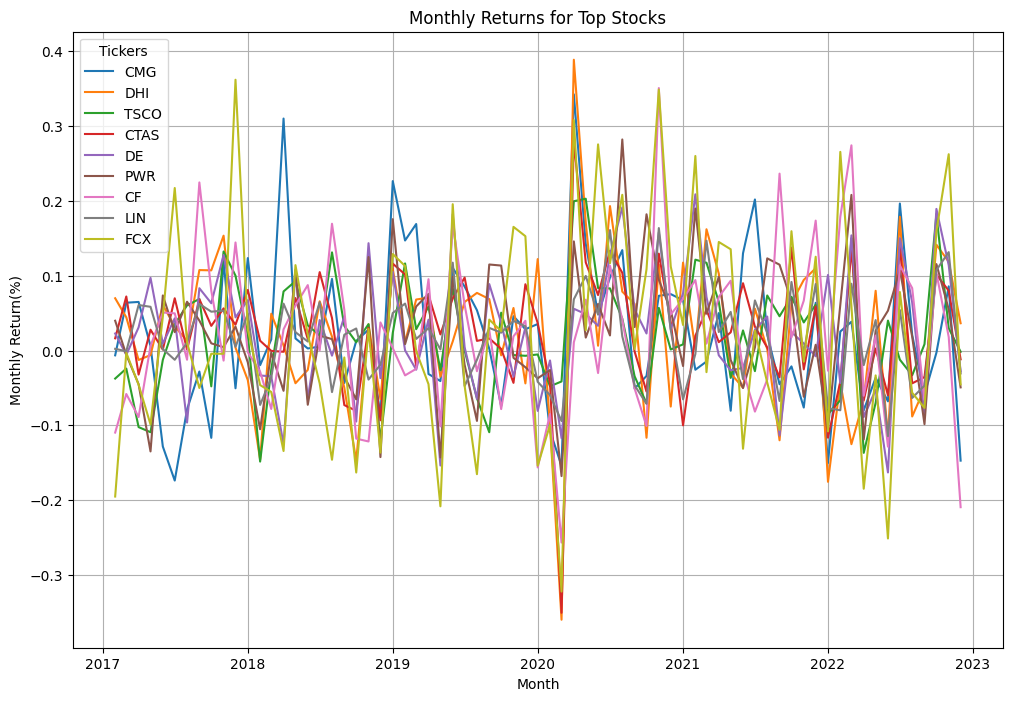

In [ ]:
# Group data by ticker to plot individual stock monthly returns
tickers = monthly_returns_df['ticker'].unique()

# Create a plot for each stock's monthly returns
plt.figure(figsize=(12, 8))
for ticker in tickers:
    stock_data = monthly_returns_df[monthly_returns_df['ticker'] == ticker]
    plt.plot(stock_data.index, stock_data['monthly_return'], label=ticker)

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Monthly Return(%)')
plt.title('Monthly Returns for Top Stocks')
plt.legend(loc="upper left", title="Tickers")
plt.grid(True)
plt.show()


## 2.3 Daily Returns and Summary Statistics

We process the top stocks to calculate their daily returns based on adjusted close prices. For each stock, the mean and standard deviation of daily returns are computed to summarize performance. The data is consolidated into a pivot table for easy analysis, and a summary table provides key statistics for all stocks, offering insights into their average returns and risk levels.


In [ ]:
# Initialize lists to store daily returns and summary statistics
daily_returns_data = []
summary_stats = []

# Loop through each sector and process tickers
for sector, top_stocks in top_stocks_combined_df.groupby('Sector'):
    for ticker in top_stocks['Ticker']:
        try:
            # Fetch daily stock data
            stock = si.get_data(ticker, start_date=start_date, end_date=end_date, interval="1d")

            # Validate the data
            if stock.empty:
                continue

            # Calculate daily returns
            stock['daily_return'] = stock['adjclose'].pct_change()

            # Add ticker and sector for identification
            stock['ticker'] = ticker
            stock['sector'] = sector

            # Append daily returns data
            daily_returns_data.append(stock[['daily_return', 'ticker', 'sector']].dropna())

            # Calculate and store summary statistics
            mean_return = stock['daily_return'].mean()
            std_dev_return = stock['daily_return'].std()
            summary_stats.append({'Stock': ticker, 'Mean': mean_return, 'St. Dev.': std_dev_return})

        except Exception as e:
            # Print errors if needed for debugging; otherwise, suppress them.
            print(f"Error processing data for {ticker}: {e}")

# Combine all daily returns into a single DataFrame
if daily_returns_data:
    daily_returns_df = pd.concat(daily_returns_data)
    print("\nDaily Returns for Top Stocks:")
    print(daily_returns_df)

    # Create a pivot table of daily returns
    combined_pivot_data = daily_returns_df.pivot_table(
        index=daily_returns_df.index, columns='ticker', values='daily_return'
    )
    print("\nPivot Table of Daily Returns:")
    print(combined_pivot_data)

    # Convert summary statistics to a DataFrame
    summary_stats_df = pd.DataFrame(summary_stats)

    # Print the mean and standard deviation table at the end
    print("\nSummary of Means and Standard Deviations of Daily Returns:")
    print(summary_stats_df)
else:
    print("\nNo daily returns data available.")



Daily Returns for Top Stocks:
            daily_return ticker                  sector
2017-01-04      0.018918    CMG  Consumer Discretionary
2017-01-05      0.026266    CMG  Consumer Discretionary
2017-01-06      0.016714    CMG  Consumer Discretionary
2017-01-09     -0.008483    CMG  Consumer Discretionary
2017-01-10      0.049157    CMG  Consumer Discretionary
...                  ...    ...                     ...
2022-12-23      0.011415    FCX               Materials
2022-12-27      0.020472    FCX               Materials
2022-12-28     -0.025720    FCX               Materials
2022-12-29      0.011352    FCX               Materials
2022-12-30     -0.008092    FCX               Materials

[13581 rows x 3 columns]

Pivot Table of Daily Returns:
ticker            CF       CMG      CTAS        DE       DHI       FCX  \
2017-01-04  0.036712  0.018918  0.008511  0.017011  0.024310  0.076198   
2017-01-05  0.000303  0.026266 -0.008780 -0.004442  0.004251 -0.014161   
2017-01-06  0.0127

In [ ]:
# Calculate the correlation matrix for combined_pivot_data
corr_matrix = combined_pivot_data.corr()

# Display the correlation matrix
corr_matrix


ticker,CF,CMG,CTAS,DE,DHI,FCX,LIN,PWR,TSCO
ticker,,,,,,,,,
CF,1.000000,0.220674,0.424457,0.528619,0.299574,0.519550,0.422809,0.496369,0.253243
CMG,0.220674,1.000000,0.410281,0.267870,0.390055,0.346797,0.366568,0.324252,0.365881
CTAS,0.424457,0.410281,1.000000,0.501528,0.510588,0.459577,0.584944,0.546893,0.370141
DE,0.528619,0.267870,0.501528,1.000000,0.394624,0.571263,0.528924,0.593625,0.356330
DHI,0.299574,0.390055,0.510588,0.394624,1.000000,0.383495,0.459673,0.463386,0.411342
FCX,0.519550,0.346797,0.459577,0.571263,0.383495,1.000000,0.526131,0.543125,0.317784
LIN,0.422809,0.366568,0.584944,0.528924,0.459673,0.526131,1.000000,0.515977,0.362110
PWR,0.496369,0.324252,0.546893,0.593625,0.463386,0.543125,0.515977,1.000000,0.391277
TSCO,0.253243,0.365881,0.370141,0.356330,0.411342,0.317784,0.362110,0.391277,1.000000


### Calculating Covariance and Mean Returns

We analyze the daily returns of selected stocks to compute two key metrics:
* The covariance matrix and mean returns. The covariance matrix reflects how
stock prices move in relation to each other, while mean returns summarize the average performance of each stock. These metrics form the foundation for building a balanced portfolio.


In [ ]:
# Ensure the daily_returns_df exists and is valid
if not daily_returns_df.empty:
    # Pivot the data to get a matrix with stocks as columns and dates as rows
    combined_pivot_data = daily_returns_df.pivot_table(
        index=daily_returns_df.index, columns='ticker', values='daily_return'
    )

    # Drop rows with missing values for clean calculations
    combined_pivot_data = combined_pivot_data.dropna()

    # Calculate the covariance matrix and mean returns
    covariance_matrix = combined_pivot_data.cov()
    mean_returns = combined_pivot_data.mean()

    # Display the results
    print("\nCovariance Matrix:")
    print(covariance_matrix)
    print("\nMean Returns:")
    print(mean_returns)
else:
    print("No data available for optimization.")



Covariance Matrix:
ticker        CF       CMG      CTAS        DE       DHI       FCX       LIN  \
ticker                                                                         
CF      0.000715  0.000140  0.000214  0.000285  0.000191  0.000451  0.000182   
CMG     0.000140  0.000562  0.000183  0.000128  0.000220  0.000267  0.000140   
CTAS    0.000214  0.000183  0.000354  0.000191  0.000229  0.000281  0.000178   
DE      0.000285  0.000128  0.000191  0.000407  0.000190  0.000375  0.000172   
DHI     0.000191  0.000220  0.000229  0.000190  0.000567  0.000297  0.000177   
FCX     0.000451  0.000267  0.000281  0.000375  0.000297  0.001056  0.000276   
LIN     0.000182  0.000140  0.000178  0.000172  0.000177  0.000276  0.000260   
PWR     0.000280  0.000162  0.000217  0.000252  0.000232  0.000372  0.000175   
TSCO    0.000129  0.000166  0.000133  0.000137  0.000187  0.000197  0.000111   

ticker       PWR      TSCO  
ticker                      
CF      0.000280  0.000129  
CMG     0.00

### Building the Optimization Model

The optimization model aims to maximize portfolio returns while meeting specific constraints.
* Allocations must sum to 100%, with each selected stock receiving at least 2% of the total budget. Additionally, the model ensures sector diversification by requiring at least one stock from each sector. This setup helps create a well-rounded portfolio.


In [ ]:
# Extract valid tickers from the provided mean returns index
valid_tickers = mean_returns.index.tolist()  # Ensure all tickers are valid
print(f"Valid Tickers: {valid_tickers}")

# Create stocks_by_sector dictionary
stocks_by_sector = top_stocks_combined_df.groupby("Sector")["Ticker"].apply(list).to_dict()

print("\nStocks by Sector:")
print(stocks_by_sector)

# Initialize the Pyomo model
model = ConcreteModel()

# Define decision variables for valid tickers
model.variables = Var(valid_tickers, within=NonNegativeReals, bounds=(0, 1))  # Allocation
model.activations = Var(valid_tickers, within=Binary)  # Activation (0 or 1)

# Objective: Maximize Portfolio Return
model.objective = Objective(
    expr=sum(model.variables[ticker] * model.activations[ticker] * mean_returns[ticker] for ticker in valid_tickers),
    sense=maximize,
)

# Constraint 1: Allocations must sum to 1
model.allocation_sum = Constraint(
    expr=sum(model.variables[ticker] * model.activations[ticker] for ticker in valid_tickers) == 1
)

# Constraint 2: Minimum allocation (2%) if selected, otherwise 0
model.allocation_constraints = ConstraintList()
for ticker in valid_tickers:
    model.allocation_constraints.add(
        model.variables[ticker] >= 0.02 * model.activations[ticker]
    )
    model.allocation_constraints.add(
        model.variables[ticker] <= model.activations[ticker]  # If not activated, allocation is zero
    )

# Constraint 3: At least one stock per sector
for sector, stocks in stocks_by_sector.items():
    # Filter stocks by valid tickers
    valid_sector_stocks = [ticker for ticker in stocks if ticker in valid_tickers]
    if valid_sector_stocks:
        model.add_component(
            f"sector_{sector}_constraint",
            Constraint(expr=sum(model.activations[ticker] for ticker in valid_sector_stocks) >= 1),
        )

# Display the model summary for verification
print("\nModel Summary:")
model.pprint()


Valid Tickers: ['CF', 'CMG', 'CTAS', 'DE', 'DHI', 'FCX', 'LIN', 'PWR', 'TSCO']

Stocks by Sector:
{'Consumer Discretionary': ['CMG', 'DHI', 'TSCO'], 'Industrials': ['CTAS', 'DE', 'PWR'], 'Materials': ['CF', 'LIN', 'FCX']}

Model Summary:
2 Var Declarations
    activations : Size=9, Index={CF, CMG, CTAS, DE, DHI, FCX, LIN, PWR, TSCO}
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
          CF :     0 :  None :     1 : False :  True : Binary
         CMG :     0 :  None :     1 : False :  True : Binary
        CTAS :     0 :  None :     1 : False :  True : Binary
          DE :     0 :  None :     1 : False :  True : Binary
         DHI :     0 :  None :     1 : False :  True : Binary
         FCX :     0 :  None :     1 : False :  True : Binary
         LIN :     0 :  None :     1 : False :  True : Binary
         PWR :     0 :  None :     1 : False :  True : Binary
        TSCO :     0 :  None :     1 : False :  True : Binary
    variables : Size=9, Index={CF, CMG, CTAS,

<ipython-input-17-9f41bbf1a169>:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  expr=sum(model.variables[ticker] * model.activations[ticker] * mean_returns[ticker] for ticker in valid_tickers),
<ipython-input-17-9f41bbf1a169>:26: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  expr=sum(model.variables[ticker] * model.activations[ticker] for ticker in valid_tickers) == 1
<ipython-input-17-9f41bbf1a169>:46: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  Constraint(expr=sum(model.activations[ticker] for ticker in valid_sector_stocks) >= 1),


In [ ]:
# Define Risk (Variance) Calculation
def calc_risk(model):
    risk_expr = 0
    for i in valid_tickers:
        for j in valid_tickers:
            risk_expr += (
                model.variables[i]
                * covariance_matrix.loc[i, j]
                * model.variables[j]
            )
    return risk_expr

# Add Risk Expression to Model
# This allows dynamic adjustment of risk levels in the optimization process
model.portfolio_risk = Expression(expr=calc_risk(model))

# Placeholder for Risk Constraint
# Risk is iteratively updated during optimization
model.risk_constraint = Constraint(expr=model.portfolio_risk <= 0.02)


### Solving the Model Across Risk Levels

The model is tested across 100 incremental risk levels to identify feasible solutions. For each level, we store the portfolio's stock allocations and expected returns. This process helps map out the efficient frontier, showcasing the optimal balance between risk and return.


In [ ]:
# Define fixed step size
step_size = 0.000015  # step size
min_risk = 0   # Starting risk level
max_levels = 100    # Maximum number of risk levels

# Calculate max_risk based on step size and max levels
max_risk = min_risk + (max_levels - 1) * step_size

# Generate risk levels with the defined step size
risk_limits = np.arange(min_risk, max_risk + step_size, step_size)[:max_levels]  # Ensure exactly 100 levels

param_analysis = {}  # To store allocation results
returns = {}  # To store expected returns
feasible_risk_levels = []  # To store only feasible risk levels

# Iterate over risk levels
for risk_level in risk_limits:
    print(f"Solving for risk level: {risk_level:.6f}...")

    # Update risk constraint dynamically
    if hasattr(model, 'risk_constraint'):
        model.del_component(model.risk_constraint)  # Remove the previous constraint to avoid duplication
    model.risk_constraint = Constraint(expr=model.portfolio_risk <= risk_level)

    # Solves the model
    solver = SolverFactory('bonmin', executable='/content/bin/bonmin')
    result = solver.solve(model)

    # Check for optimality
    if result.solver.termination_condition == TerminationCondition.optimal:
        # Store allocations and returns
        param_analysis[risk_level] = {ticker: model.variables[ticker].value for ticker in valid_tickers}
        returns[risk_level] = sum(
            model.variables[ticker].value * mean_returns[ticker]
            for ticker in valid_tickers
        )
        feasible_risk_levels.append(risk_level)  # Add feasible risk level
    else:
        print(f"Risk level {risk_level:.6f} is infeasible.")  # Skip infeasible solutions

# Print the results for feasible and infeasible solutions
total_risk_levels = len(risk_limits)  # Total risk levels
feasible_count = len(feasible_risk_levels)  # Total feasible solutions

print(f"\nSummary of Risk Levels:")
print(f"Total Risk Levels Tested: {total_risk_levels}")
print(f"Total Feasible Solutions: {feasible_count}")
print(f"Total Infeasible Solutions: {total_risk_levels - feasible_count}")


Solving for risk level: 0.000000...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000000 is infeasible.
Solving for risk level: 0.000015...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000015 is infeasible.
Solving for risk level: 0.000030...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000030 is infeasible.
Solving for risk level: 0.000045...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000045 is infeasible.
Solving for risk level: 0.000060...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000060 is infeasible.
Solving for risk level: 0.000075...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000075 is infeasible.
Solving for risk level: 0.000090...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000090 is infeasible.
Solving for risk level: 0.000105...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000105 is infeasible.
Solving for risk level: 0.000120...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000120 is infeasible.
Solving for risk level: 0.000135...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000135 is infeasible.
Solving for risk level: 0.000150...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000150 is infeasible.
Solving for risk level: 0.000165...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000165 is infeasible.
Solving for risk level: 0.000180...


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000180 is infeasible.
Solving for risk level: 0.000195...
Solving for risk level: 0.000210...
Solving for risk level: 0.000225...


<ipython-input-19-e1f51e8a7860>:33: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  returns[risk_level] = sum(


Solving for risk level: 0.000240...
Solving for risk level: 0.000255...
Solving for risk level: 0.000270...
Solving for risk level: 0.000285...
Solving for risk level: 0.000300...
Solving for risk level: 0.000315...
Solving for risk level: 0.000330...
Solving for risk level: 0.000345...
Solving for risk level: 0.000360...
Solving for risk level: 0.000375...
Solving for risk level: 0.000390...
Solving for risk level: 0.000405...
Solving for risk level: 0.000420...
Solving for risk level: 0.000435...
Solving for risk level: 0.000450...
Solving for risk level: 0.000465...
Solving for risk level: 0.000480...
Solving for risk level: 0.000495...
Solving for risk level: 0.000510...
Solving for risk level: 0.000525...
Solving for risk level: 0.000540...
Solving for risk level: 0.000555...
Solving for risk level: 0.000570...
Solving for risk level: 0.000585...
Solving for risk level: 0.000600...
Solving for risk level: 0.000615...
Solving for risk level: 0.000630...
Solving for risk level: 0.00

## 2.4 Sector-Level Allocation Summary

Once the optimization is complete, the allocations are grouped by sector and displayed as percentages for each stock. This consolidated view highlights how resources are distributed across sectors and individual stocks, offering a clear picture of the portfolio’s structure at different risk levels.


In [ ]:
# Create a mapping of stocks to sectors
sectors = {ticker: sector for sector, tickers in stocks_by_sector.items() for ticker in tickers}

# Create a DataFrame to store allocations for all feasible risk levels
allocation_table = pd.DataFrame.from_dict(param_analysis, orient='index', columns=valid_tickers)

# Scale allocations to represent percentages (multiply by 100)
allocation_table = allocation_table * 100

# Group allocations by sector with stock details
sector_allocation_detail = {}

for sector, tickers in stocks_by_sector.items():
    sector_allocations = allocation_table[tickers].copy()  # Avoid view vs copy warnings
    sector_allocations['Sector Total'] = sector_allocations.sum(axis=1)
    sector_allocation_detail[sector] = sector_allocations

# Combine all sector details into one consolidated DataFrame
sector_level_allocation = pd.concat(sector_allocation_detail, axis=1)

# Add a total allocation column for all sectors
sector_level_allocation['Total Allocation (%)'] = sector_level_allocation.filter(like='Sector Total').sum(axis=1)

# Rename the index to make it more descriptive
sector_level_allocation.index.name = 'Risk Level'

# Reset the index to make it a column
sector_level_allocation.reset_index(inplace=True)

# Display the sector-level allocation table with stock details
print("Sector-Level Allocation Table with Stock Names (in %):")
sector_level_allocation.style.format(subset=sector_level_allocation.columns[1:], precision=2)


Sector-Level Allocation Table with Stock Names (in %):


## 2.5 Visualizing Portfolio Allocations and the Efficient Frontier

We visualize the results of our optimization model in two ways:

1. **Portfolio Allocations Across Risk Levels**: A plot shows how stock allocations change with increasing risk levels. This helps us understand the diversification strategy at different levels of risk.

2. **Efficient Frontier**: A graph of risk versus return highlights the optimal balance between risk and reward. The curve provides a clear view of the best portfolios for maximizing returns at specific risk levels.

These visualizations are key to interpreting the portfolio's performance and identifying the most suitable investment strategies.


<Figure size 1600x800 with 0 Axes>

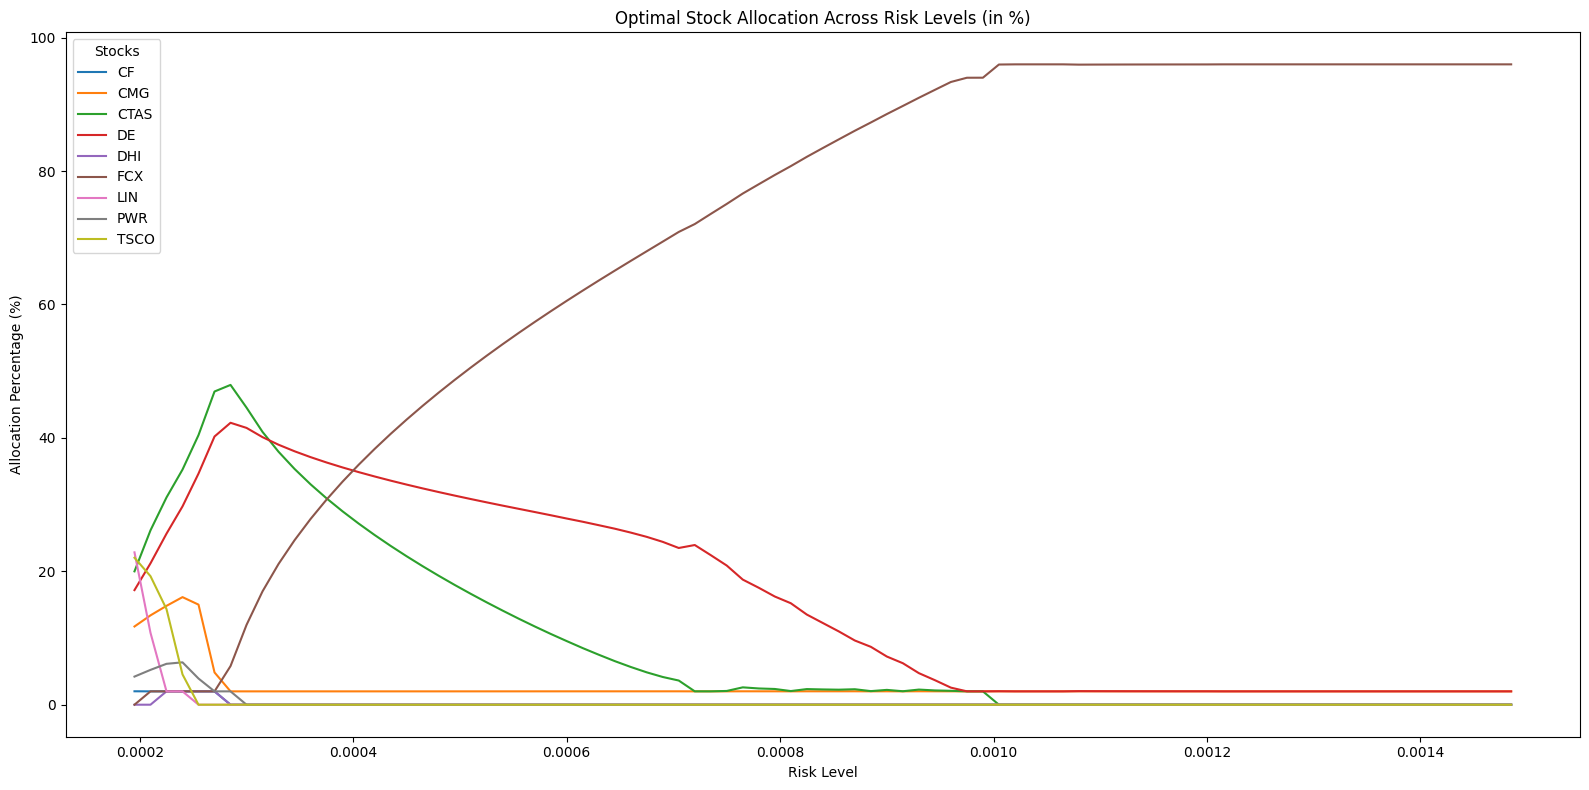

In [ ]:
# Convert allocation results to a DataFrame
allocation_df = pd.DataFrame.from_dict(param_analysis, orient='index', columns=valid_tickers)

# Scale allocations to percentages for visualization
allocation_df = allocation_df * 100

# Plot allocations across all risk levels
plt.figure(figsize=(16, 8))  # Set a larger plot size
allocation_df.plot(title="Optimal Stock Allocation Across Risk Levels (in %)", legend=True, figsize=(16, 8))
plt.xlabel("Risk Level")
plt.ylabel("Allocation Percentage (%)")  # Update label to reflect percentages
plt.legend(loc="upper left", title="Stocks")

# Finalize and display the plot
plt.tight_layout()
plt.show()


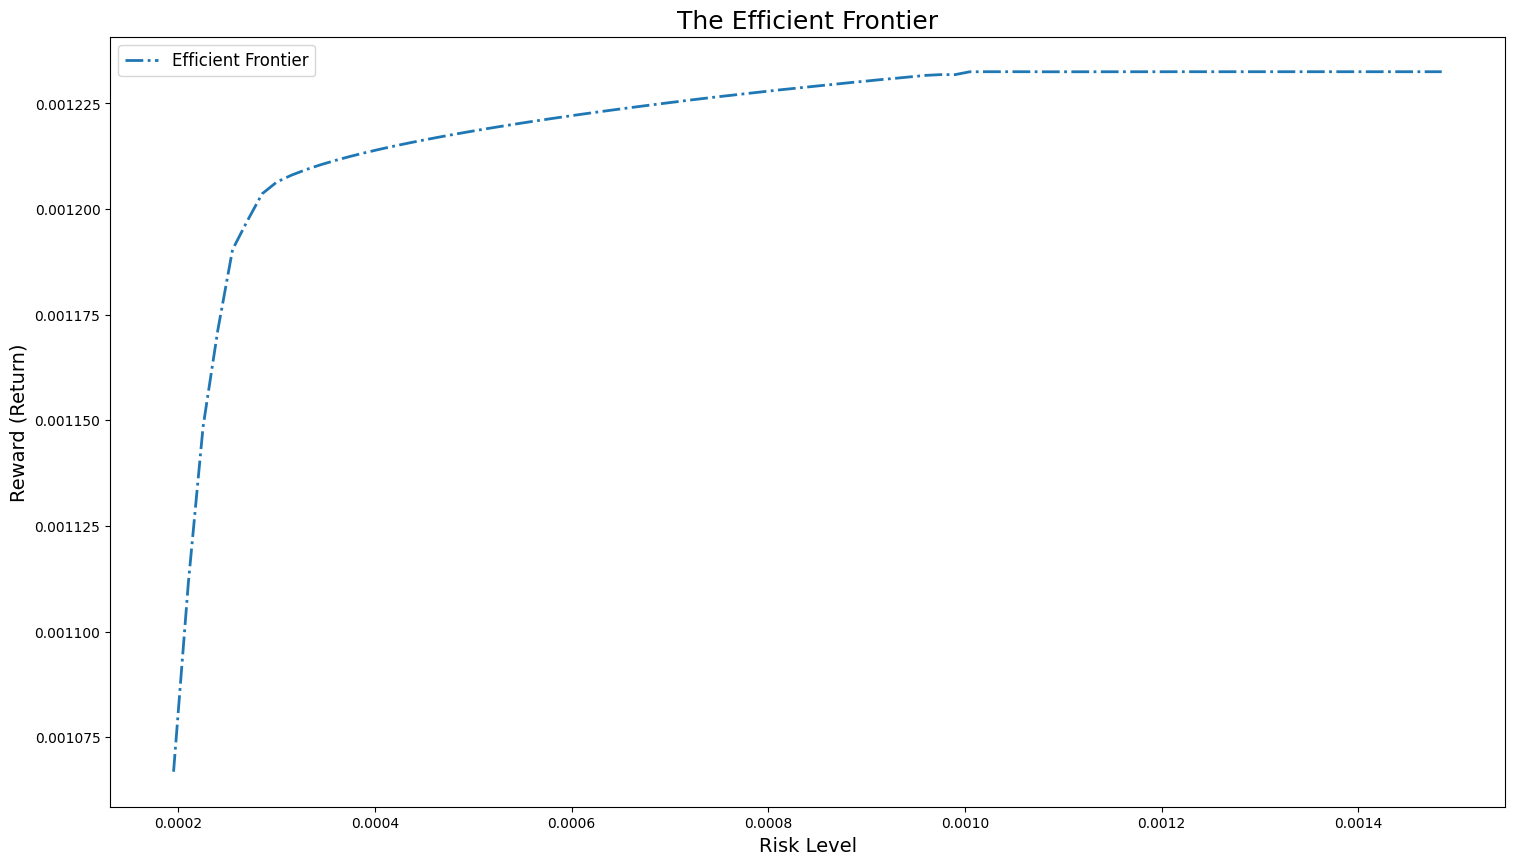

In [ ]:
efficient_frontier = pd.DataFrame({
    "Risk Level": list(returns.keys()),
    "Expected Return": list(returns.values()),
}).sort_values(by="Risk Level")

# Extract risk and reward values
risk = efficient_frontier["Risk Level"]
reward = efficient_frontier["Expected Return"]

# Plot the efficient frontier
figure(figsize=(18, 10))
plot(risk, reward, '-.', label='Efficient Frontier', linewidth=2)  # Adjust line width for better visibility
title('The Efficient Frontier', fontsize=18)
xlabel('Risk Level', fontsize=14)
ylabel('Reward (Return)', fontsize=14)
legend(loc="upper left", fontsize=12)
show()


## 2.6 Portfolio Allocation Summary



In [ ]:
# @title ## Portfolio Allocations {"display-mode":"form"}
import pandas as pd

def select_optimized_portfolio(param_analysis, valid_tickers):
    """
    Select a valid portfolio allocation from the MPT model that meets all constraints.

    Args:
        param_analysis (dict): Portfolio allocations for different risk levels.
        valid_tickers (list): List of valid tickers.

    Returns:
        dict: Selected portfolio with stock allocations, risk level, and total allocation.
    """
    # Convert param_analysis to a DataFrame
    param_df = pd.DataFrame.from_dict(param_analysis, orient='index', columns=valid_tickers)

    # Filter valid portfolios (max allocation < 50% and at least 3 stocks)
    valid_portfolios = param_df[(param_df.max(axis=1) < 0.5) & (param_df.gt(0).sum(axis=1) >= 3)]

    if valid_portfolios.empty:
        raise ValueError("No valid portfolio found that meets the constraints.")

    # Select the first valid portfolio
    selected_risk_level = valid_portfolios.index[0]
    selected_allocations = valid_portfolios.loc[selected_risk_level]

    # Scale allocations to sum to 100%
    scaled_allocations = (selected_allocations / selected_allocations.sum()) * 100

    return {
        "Risk Level": selected_risk_level,
        "Portfolio": scaled_allocations.round(2).to_dict(),
        "Total Allocation (%)": round(scaled_allocations.sum(), 2)
    }

# Example usage:
try:
    selected_portfolio = select_optimized_portfolio(param_analysis, valid_tickers)
    print(f"Selected Portfolio at Risk Level {selected_portfolio['Risk Level']}:")
    for stock, allocation in selected_portfolio["Portfolio"].items():
        print(f"{stock}: {allocation}%")
    print(f"\nTotal Allocation: {selected_portfolio['Total Allocation (%)']}%")
except ValueError as e:
    print(e)

portfolio_allocation = param_analysis[0.000195]

Selected Portfolio at Risk Level 0.000195:
CF: 2.01%
CMG: 11.73%
CTAS: 19.99%
DE: 17.18%
DHI: 0.0%
FCX: 0.0%
LIN: 22.84%
PWR: 4.22%
TSCO: 22.03%

Total Allocation: 100.0%


We selected the portfolio at risk level 0.000195 because it offers a diverse allocation across three major sectors: Consumer Discretionary (35.81%), Industrials (31.95%), and Materials (32.23%). The allocation is well-balanced within each sector, ensuring no single stock exceeds 23.45% (TSCO) or falls below 2.00%. This balance provides exposure to growth opportunities while reducing the risk of over-reliance on any single stock or sector. We believe this portfolio achieves an optimal distribution of risk and reward.

# 3.Investment Strategies

In [ ]:
portfolio_allocation = param_analysis[0.000195]
print(portfolio_allocation)


{'CF': 0.02012511190442549, 'CMG': 0.11726792794671326, 'CTAS': 0.1999158953818351, 'DE': 0.1717949302351339, 'DHI': 3.292111991779719e-09, 'FCX': 3.274669848296358e-09, 'LIN': 0.22841142471504775, 'PWR': 0.04215088454962022, 'TSCO': 0.22033382526722425}


## 3.1 Allocate Investment to Portfolio

In [ ]:
# Initial investment amount
initial_investment = 100000  # Total amount to invest

# Portfolio allocation at risk level 0.000195 from the MPT model
portfolio_allocation = param_analysis[0.000195]  # Selected portfolio allocation
portfolio_allocation_percentages = {ticker: allocation for ticker, allocation in portfolio_allocation.items() if allocation > 0}

# Allocate the initial investment to the portfolio
investment_allocation = {
    ticker: round(initial_investment * allocation, 2)
    for ticker, allocation in portfolio_allocation_percentages.items()
}

# Display the allocated investment for each stock
print(f"\nAllocated Investment for Portfolio at (Risk Level 0.000195)\n(Total: ${initial_investment}):")
for ticker, amount in investment_allocation.items():
    print(f"{ticker}: ${amount:.2f}")

# Verify the total allocation
total_allocated = sum(list(investment_allocation.values()))  # Convert dict_values to list
print(f"\nTotal Allocated Amount: ${total_allocated:.2f}")



Allocated Investment for Portfolio at (Risk Level 0.000195)
(Total: $100000):
CF: $2012.51
CMG: $11726.79
CTAS: $19991.59
DE: $17179.49
DHI: $0.00
FCX: $0.00
LIN: $22841.14
PWR: $4215.09
TSCO: $22033.38

Total Allocated Amount: $99999.99


In [ ]:
# Define tickers from the portfolio allocation
tickers_list = list(portfolio_allocation_percentages.keys())

# Added error handling and validation for fetching stock prices
stock_prices = {}
for ticker in tickers_list:
    try:
        # Fetch daily stock prices for the year 2023
        stock_prices[ticker] = si.get_data(
            ticker,
            start_date='01/01/2023',
            end_date='12/31/2023',
            interval='1d'
        )['adjclose']
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        stock_prices[ticker] = pd.Series()  # Assign empty Series if fetching fails

# Combine prices into a single DataFrame for all tickers and validate structure
stock_prices_df = pd.DataFrame(stock_prices)

# Ensure proper date handling and sorting
stock_prices_df.index = pd.to_datetime(stock_prices_df.index)  # Convert index to datetime
stock_prices_df.sort_index(inplace=True)  # Ensure data is sorted by date

# Handle missing values (forward-fill and drop remaining NaN)
if stock_prices_df.isna().any().any():
    print("Missing data found. Handling missing values...")
    stock_prices_df.fillna(method='ffill', inplace=True)  # Forward fill missing values
    stock_prices_df.dropna(inplace=True)  # Drop rows still containing NaN after forward-fill

# Save the fetched data locally for consistency
stock_prices_df.to_csv("stock_prices_2023.csv", index=True)  # Save to CSV for later use

# Display the first few rows to verify the data
print("Daily Stock Prices for 2023:")
print(stock_prices_df.head())

# Add data validation and debugging output
print("\nData Info:")
print(stock_prices_df.info())  # Validate the structure of the DataFrame
print("\nMissing Data Check:")
print(stock_prices_df.isna().sum())  # Ensure no missing values remain


Daily Stock Prices for 2023:
                   CF        CMG        CTAS          DE        DHI  \
2023-01-03  78.267723  27.422600  106.361137  414.010468  89.114494   
2023-01-04  78.707069  27.521000  105.138786  413.220093  90.057922   
2023-01-05  80.015503  27.283199  102.698814  404.682068  90.716362   
2023-01-06  80.617188  28.041201  104.691048  416.137634  91.964439   
2023-01-09  82.135750  28.934799  104.541817  417.825714  91.168411   

                  FCX         LIN         PWR        TSCO  
2023-01-03  36.898434  310.222809  140.224060  215.323135  
2023-01-04  37.949337  308.683105  138.169708  213.692657  
2023-01-05  38.766712  297.691162  135.197891  211.898132  
2023-01-06  41.140980  308.088715  138.738129  213.837372  
2023-01-09  41.676167  313.701691  138.259460  209.823822  

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------ 

In [ ]:
# Calculate shares to buy and costs for each stock
shares_to_buy = {
    ticker: investment_allocation[ticker] / stock_prices_df[ticker].iloc[0]
    for ticker in investment_allocation.keys()
}

initial_prices = {ticker: stock_prices_df[ticker].iloc[0] for ticker in investment_allocation.keys()}

# Calculate total costs for each stock
total_costs = {
    ticker: shares_to_buy[ticker] * initial_prices[ticker]
    for ticker in investment_allocation.keys()
}

# Calculate total invested amount
total_invested = sum(list(total_costs.values()))

# Generate the investment summary
print("\nInvestment Summary:")
for ticker in investment_allocation.keys():
    print(f"{ticker}: Purchased {shares_to_buy[ticker]:.4f} shares at ${initial_prices[ticker]:.2f} per share, "
          f"costing ${total_costs[ticker]:.2f}")
print(f"\nTotal Amount Invested: ${total_invested:.2f}")



Investment Summary:
CF: Purchased 25.7132 shares at $78.27 per share, costing $2012.51
CMG: Purchased 427.6323 shares at $27.42 per share, costing $11726.79
CTAS: Purchased 187.9595 shares at $106.36 per share, costing $19991.59
DE: Purchased 41.4953 shares at $414.01 per share, costing $17179.49
DHI: Purchased 0.0000 shares at $89.11 per share, costing $0.00
FCX: Purchased 0.0000 shares at $36.90 per share, costing $0.00
LIN: Purchased 73.6282 shares at $310.22 per share, costing $22841.14
PWR: Purchased 30.0597 shares at $140.22 per share, costing $4215.09
TSCO: Purchased 102.3270 shares at $215.32 per share, costing $22033.38

Total Amount Invested: $99999.99


## 3.2 MPT Portfolio Strategies
In this section, we will discuss different strategies implemented for the MPT portfolio. These include:

* Buy-and-hold strategy for the MPT portfolio
* Daily rebalance portfolio
* Weekly rebalance portfolio
* Monthly rebalance portfolio

### Buy-and-Hold Strategy Results
This process calculates the performance of the Buy-and-Hold strategy by tracking portfolio value and returns at the end of each month in 2023. We use the MPT allocation to determine initial shares purchased for each stock and compute their value at the last trading day of every month. The portfolio's total value, returns, and individual stock performance are summarized in a table.

In [ ]:
# Filter last trading day of each month
last_trading_days = stock_prices_df.resample('M').last()

# Initialize shares and calculate initial investment
valid_tickers = [
    ticker for ticker in tickers_list
    if ticker in stock_prices_df.columns and ticker in investment_allocation
]

# Identify the first working day in the dataset
first_working_day = stock_prices_df.index[0]  # Assuming the dataset starts from the first working day

# Alternatively, if there might be missing data, get the first non-NaN value for each ticker
first_prices = stock_prices_df[valid_tickers].iloc[0]

shares_bought_hold = {
    ticker: investment_allocation[ticker] / first_prices[ticker]
    for ticker in valid_tickers
}

# Generate the results table for last trading days of each month
results = []

for date in last_trading_days.index:
    valid_prices = {
        ticker: last_trading_days.loc[date, ticker]
        for ticker in valid_tickers if not pd.isna(last_trading_days.loc[date, ticker])
    }

    # Calculate portfolio value on the last trading day
    portfolio_value = sum(
        shares_bought_hold[ticker] * valid_prices[ticker]
        for ticker in valid_prices
    )

    # Calculate metrics for each stock
    row = {"Date": date, "Portfolio Value": portfolio_value}
    initial_value = sum(list(investment_allocation.values()))
    row["Portfolio Return (%)"] = ((portfolio_value - initial_value) / initial_value) * 100

    for ticker in valid_prices:
        # Amount invested in each stock
        row[f"{ticker} Investment"] = shares_bought_hold[ticker] * valid_prices[ticker]
        # Percent return for each stock
        row[f"{ticker} Return (%)"] = ((valid_prices[ticker] / first_prices[ticker]) - 1) * 100

    results.append(row)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the final table
print("Buy-and-Hold Strategy Results (Monthly Last Trading Days):")
results_df.set_index("Date", inplace=True)
from IPython.display import display
display(results_df.head())


Buy-and-Hold Strategy Results (Monthly Last Trading Days):


<ipython-input-28-d8165ee7a3fb>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_trading_days = stock_prices_df.resample('M').last()
<ipython-input-28-d8165ee7a3fb>:31: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  portfolio_value = sum(


,Portfolio Value,Portfolio Return (%),CF Investment,CF Return (%),CMG Investment,CMG Return (%),CTAS Investment,CTAS Return (%),DE Investment,DE Return (%),DHI Investment,DHI Return (%),FCX Investment,FCX Return (%),LIN Investment,LIN Return (%),PWR Investment,PWR Return (%),TSCO Investment,TSCO Return (%)
Date,,,,,,,,,,,,,,,,,,,,
2023-01-31,103854.488282,3.854499,2080.044106,3.355715,14080.906384,20.074687,19757.827947,-1.169302,17120.778856,-0.341751,0.0,8.833273,0.0,18.059543,23744.458062,3.954785,4562.225241,8.235536,22508.247685,2.155219
2023-02-28,104536.574494,4.536585,2119.027179,5.292753,12752.680010,8.748259,19725.724598,-1.329886,16975.013433,-1.190237,0.0,2.241975,0.0,8.402057,24995.033823,9.429888,4838.315048,14.785569,23130.780403,4.980627
2023-03-31,107884.037823,7.884049,1788.430356,-11.134337,14610.399581,24.589931,20814.873760,4.118150,16769.799858,-2.384763,0.0,8.001933,0.0,8.243290,25597.851044,12.069061,4995.395851,18.512199,23307.287372,5.781716
2023-04-30,110642.680229,10.642691,1765.979606,-12.249897,17683.623537,50.796796,20504.008891,2.563172,15353.903059,-10.626549,0.0,21.412347,0.0,0.672873,26606.816373,16.486377,5087.872383,20.706139,23640.476382,7.293917
2023-05-31,106467.006348,6.467017,1526.628069,-24.143082,17759.484947,51.443702,21448.505844,7.287644,14052.547632,-18.201602,0.0,18.390776,0.0,-8.807528,25469.660091,11.507832,5326.010104,26.355786,20884.169661,-5.215770


### Daily Rebalancing Strategy Results
This process evaluates the performance of the Daily Rebalancing Strategy by tracking portfolio value and returns at the end of each trading day in 2023. Starting with the initial MPT allocation, the portfolio is rebalanced daily to maintain the target percentages. The value of the portfolio, overall returns, and individual stock performance are calculated for every trading day and summarized in a table.

In [ ]:
# Define portfolio allocation percentages
portfolio_allocation_percentages = {
    ticker: investment_allocation[ticker] / sum(list(investment_allocation.values()))  # Convert dict_values to list
    for ticker in valid_tickers
}

# Initialize shares for valid tickers

valid_tickers = [
    ticker for ticker in tickers_list
    if ticker in stock_prices_df.columns and ticker in investment_allocation
]
if not valid_tickers:
    raise ValueError("No valid tickers found in stock_prices_df or investment_allocation.")

# Save and reuse the first trading day price for consistent share calculations
first_day = stock_prices_df.index[0]
first_prices = stock_prices_df.loc[first_day, valid_tickers]
shares_bought_daily = {
    ticker: investment_allocation[ticker] / first_prices[ticker]
    for ticker in valid_tickers
}

# Results table for daily rebalancing
daily_results = []

# Ensure consistent daily rebalancing logic with debug outputs
for day in stock_prices_df.index:
    # Fetch valid prices for the current day
    valid_prices = {
        ticker: stock_prices_df.loc[day, ticker]
        for ticker in valid_tickers if not pd.isna(stock_prices_df.loc[day, ticker])
    }

    # Calculate total portfolio value
    daily_value = sum(
        shares_bought_daily[ticker] * valid_prices[ticker]
        for ticker in valid_prices
    )

    # Store daily metrics
    row = {"Date": day, "Portfolio Value": daily_value}
    initial_value = sum(list(investment_allocation.values()))
    row["Portfolio Return (%)"] = ((daily_value - initial_value) / initial_value) * 100

    # Metrics for each stock
    for ticker in valid_prices:
        row[f"{ticker} Investment"] = shares_bought_daily[ticker] * valid_prices[ticker]
        row[f"{ticker} Return (%)"] = ((valid_prices[ticker] / first_prices[ticker]) - 1) * 100

    daily_results.append(row)

    # Rebalance portfolio daily
    # Round shares to avoid floating-point inconsistencies
    for ticker in valid_prices:
        shares_bought_daily[ticker] = round(
            (daily_value * portfolio_allocation_percentages[ticker]) / valid_prices[ticker],
            6
        )

# Convert daily results into a DataFrame
daily_rebalance_df = pd.DataFrame(daily_results)
daily_rebalance_df.set_index("Date", inplace=True)

# Save results for reproducibility
daily_rebalance_df.to_csv("daily_rebalance_results.csv")

# Display the table for all trading days
print("Daily Rebalancing Strategy Results:")
display(daily_rebalance_df.head())


<ipython-input-29-b70d729ba1d4>:36: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  daily_value = sum(


Daily Rebalancing Strategy Results:


,Portfolio Value,Portfolio Return (%),CF Investment,CF Return (%),CMG Investment,CMG Return (%),CTAS Investment,CTAS Return (%),DE Investment,DE Return (%),DHI Investment,DHI Return (%),FCX Investment,FCX Return (%),LIN Investment,LIN Return (%),PWR Investment,PWR Return (%),TSCO Investment,TSCO Return (%)
Date,,,,,,,,,,,,,,,,,,,,
2023-01-03,99999.990000,0.000000,2012.510000,0.000000,11726.790000,0.000000,19991.590000,0.000000,17179.490000,0.000000,0.0,0.000000,0.0,0.000000,22841.140000,0.000000,4215.090000,0.000000,22033.380000,0.000000
2023-01-04,99448.855601,-0.551134,2023.806996,0.561338,11768.869067,0.358829,19761.837492,-1.149246,17146.692955,-0.190907,0.0,1.058670,0.0,2.848097,22727.774326,-0.496322,4153.336801,-1.465049,21866.537963,-0.757224
2023-01-05,97483.916895,-2.516073,2034.690139,2.233079,11561.390432,-0.508342,19420.018500,-3.443291,16731.798624,-2.253180,0.0,1.797539,0.0,5.063300,21906.383817,-4.039563,4101.698790,-3.584384,21727.936592,-1.590634
2023-01-06,99750.277685,-0.249712,1976.626297,3.001831,11749.339984,2.255807,19866.642012,-1.570207,17221.315016,0.513795,0.0,3.198071,0.0,11.497903,23044.147016,-0.687923,4216.632844,-1.059684,21675.574516,-0.690016
2023-01-09,100190.024952,0.190035,2045.298939,4.942046,12070.275209,5.514428,19913.242857,-1.710513,17206.105943,0.921534,0.0,2.304807,0.0,12.948335,23199.199639,1.121414,4190.058026,-1.401043,21565.844340,-2.553982


###Weekly Rebalancing Strategy Results
This process analyzes the Weekly Rebalancing Strategy by tracking portfolio value and returns at the end of each trading week in 2023. Using the initial MPT allocation, the portfolio is rebalanced every Friday (or the last trading day of the week) to realign with the target percentages. The portfolio's total value, overall returns, and individual stock performance are calculated and presented in a table.

In [ ]:
# Define portfolio allocation percentages
portfolio_allocation_percentages = {
    ticker: investment_allocation[ticker] / sum(list(investment_allocation.values()))  # Convert dict_values to list
    for ticker in valid_tickers
}

# Validate and fix `valid_tickers`
valid_tickers = [
    ticker for ticker in tickers_list
    if ticker in stock_prices_df.columns and ticker in investment_allocation
]
if not valid_tickers:
    raise ValueError("No valid tickers found in stock_prices_df or investment_allocation.")

# Use fixed first-day prices for consistency
first_day = stock_prices_df.index[0]
first_prices = stock_prices_df.loc[first_day, valid_tickers]
shares_bought_weekly = {
    ticker: investment_allocation[ticker] / first_prices[ticker]
    for ticker in valid_tickers
}

# Initialize results for weekly rebalancing
weekly_results = []

# Iterate through each trading day
for day in stock_prices_df.index:
    # Fetch valid prices for the current day
    valid_prices = {
        ticker: stock_prices_df.loc[day, ticker]
        for ticker in valid_tickers if not pd.isna(stock_prices_df.loc[day, ticker])
    }

    # Calculate total portfolio value
    weekly_value = sum(
        shares_bought_weekly[ticker] * valid_prices[ticker]
        for ticker in valid_prices
    )

    # Rebalance on Fridays or the last trading day
    if day.weekday() == 4 or day == stock_prices_df.index[-1]:  # 4 corresponds to Friday
        # Store weekly metrics
        row = {"Date": day, "Portfolio Value": weekly_value}
        initial_value = sum(list(investment_allocation.values()))
        row["Portfolio Return (%)"] = ((weekly_value - initial_value) / initial_value) * 100

        # Add individual stock metrics
        for ticker in valid_prices:
            row[f"{ticker} Investment"] = shares_bought_weekly[ticker] * valid_prices[ticker]
            row[f"{ticker} Return (%)"] = ((valid_prices[ticker] / first_prices[ticker]) - 1) * 100

        weekly_results.append(row)

        # Rebalance portfolio
        for ticker in valid_prices:
            shares_bought_weekly[ticker] = round(
                (weekly_value * portfolio_allocation_percentages[ticker]) / valid_prices[ticker],
                6
            )

# Convert weekly results into a DataFrame
weekly_rebalance_df = pd.DataFrame(weekly_results)
weekly_rebalance_df.set_index("Date", inplace=True)

# Save results for reproducibility
weekly_rebalance_df.to_csv("weekly_rebalance_results.csv")

# Display the table for the last trading day of each week
print("Weekly Rebalancing Strategy Results:")
display(weekly_rebalance_df.head())

Weekly Rebalancing Strategy Results:


<ipython-input-30-31c3911da760>:35: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  weekly_value = sum(


,Portfolio Value,Portfolio Return (%),CF Investment,CF Return (%),CMG Investment,CMG Return (%),CTAS Investment,CTAS Return (%),DE Investment,DE Return (%),DHI Investment,DHI Return (%),FCX Investment,FCX Return (%),LIN Investment,LIN Return (%),PWR Investment,PWR Return (%),TSCO Investment,TSCO Return (%)
Date,,,,,,,,,,,,,,,,,,,,
2023-01-06,99745.464116,-0.254526,2072.922140,3.001831,11991.323715,2.255807,19677.680711,-1.570207,17267.757430,0.513795,0.0,3.198071,0.0,11.497903,22684.010531,-0.687923,4170.423382,-1.059684,21881.346208,-0.690016
2023-01-13,103193.145733,3.193156,2066.841265,6.052478,12719.004001,11.190770,20255.653663,-0.015587,17664.539644,3.615453,0.0,4.719892,0.0,19.197281,24076.510069,4.950528,4487.836292,5.611268,21922.760798,-0.936462
2023-01-20,100305.701773,0.305712,2066.497312,5.527763,12344.290383,13.423964,20061.490599,-2.770676,16557.424050,-3.226570,0.0,4.190562,0.0,20.149797,23183.189019,3.226008,4283.486699,4.003972,21809.323711,-4.978033
2023-01-27,102273.395146,2.273405,1939.298150,1.378907,12205.784398,17.697084,20085.779954,-2.610314,17550.125174,-1.440062,0.0,6.440225,0.0,18.588713,22637.673509,1.994672,4336.682625,6.678046,23518.051337,1.115692
2023-02-03,102943.387124,2.943397,2128.869476,4.856626,12581.916962,23.472617,20686.886834,-1.463292,17060.821515,-4.296597,0.0,9.693440,0.0,14.196549,23281.269448,1.649127,4380.752719,8.406226,22822.870170,2.410615


### Monthly Rebalancing Strategy Results
This process evaluates the Monthly Rebalancing Strategy by tracking portfolio value and returns at the end of each month in 2023. Using the MPT allocation, the portfolio is rebalanced on the last trading day of every month to realign with target percentages. The table summarizes the portfolio's total value, overall returns, and individual stock performance.

In [ ]:
# Define portfolio allocation percentages
portfolio_allocation_percentages = {
    ticker: investment_allocation[ticker] / sum(list(investment_allocation.values()))
    for ticker in valid_tickers
}

# Validate and fix `valid_tickers`
valid_tickers = [
    ticker for ticker in tickers_list
    if ticker in stock_prices_df.columns and ticker in investment_allocation
]
if not valid_tickers:
    raise ValueError("No valid tickers found in stock_prices_df or investment_allocation.")

# Use fixed first-day prices for consistency
first_day = stock_prices_df.index[0]
first_prices = stock_prices_df.loc[first_day, valid_tickers]
shares_bought_monthly = {
    ticker: investment_allocation[ticker] / first_prices[ticker]
    for ticker in valid_tickers
}

# Initialize results for monthly rebalancing
monthly_results = []

# Iterate through each trading day
for day in stock_prices_df.index:
    # Fetch valid prices for the current day
    valid_prices = {
        ticker: stock_prices_df.loc[day, ticker]
        for ticker in valid_tickers if not pd.isna(stock_prices_df.loc[day, ticker])
    }

    # Calculate total portfolio value
    monthly_value = sum(
        shares_bought_monthly[ticker] * valid_prices[ticker]
        for ticker in valid_prices
    )

    # Check if it's the last trading day of the month
    next_day = day + pd.Timedelta(days=1)
    is_last_day_of_month = (
        next_day.month != day.month
        if next_day in stock_prices_df.index else True
    )

    # Rebalance on the last trading day of the month
    if is_last_day_of_month:
        # Store monthly metrics
        row = {"Date": day, "Portfolio Value": monthly_value}
        initial_value = sum(list(investment_allocation.values()))
        row["Portfolio Return (%)"] = ((monthly_value - initial_value) / initial_value) * 100

        # Add individual stock metrics
        for ticker in valid_prices:
            row[f"{ticker} Investment"] = shares_bought_monthly[ticker] * valid_prices[ticker]
            row[f"{ticker} Return (%)"] = ((valid_prices[ticker] / first_prices[ticker]) - 1) * 100

        monthly_results.append(row)

        # Rebalance the portfolio
        for ticker in valid_prices:
            shares_bought_monthly[ticker] = round(
                (monthly_value * portfolio_allocation_percentages[ticker]) / valid_prices[ticker],
                6
            )

# Convert monthly results into a DataFrame
monthly_rebalance_df = pd.DataFrame(monthly_results)
monthly_rebalance_df.set_index("Date", inplace=True)

# Save results for reproducibility
monthly_rebalance_df.to_csv("monthly_rebalance_results.csv")

# Display the table for the last trading day of each month
print("Monthly Rebalancing Strategy Results:")
display(monthly_rebalance_df.head())


<ipython-input-31-3ac7b66cb09a>:35: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  monthly_value = sum(


Monthly Rebalancing Strategy Results:


,Portfolio Value,Portfolio Return (%),CF Investment,CF Return (%),CMG Investment,CMG Return (%),CTAS Investment,CTAS Return (%),DE Investment,DE Return (%),DHI Investment,DHI Return (%),FCX Investment,FCX Return (%),LIN Investment,LIN Return (%),PWR Investment,PWR Return (%),TSCO Investment,TSCO Return (%)
Date,,,,,,,,,,,,,,,,,,,,
2023-01-06,99745.464116,-0.254526,2072.922140,3.001831,11991.323715,2.255807,19677.680711,-1.570207,17267.757430,0.513795,0.0,3.198071,0.0,11.497903,22684.010531,-0.687923,4170.423382,-1.059684,21881.346208,-0.690016
2023-01-13,103193.145733,3.193156,2066.841265,6.052478,12719.004001,11.190770,20255.653663,-0.015587,17664.539644,3.615453,0.0,4.719892,0.0,19.197281,24076.510069,4.950528,4487.836292,5.611268,21922.760798,-0.936462
2023-01-20,100305.701773,0.305712,2066.497312,5.527763,12344.290383,13.423964,20061.490599,-2.770676,16557.424050,-3.226570,0.0,4.190562,0.0,20.149797,23183.189019,3.226008,4283.486699,4.003972,21809.323711,-4.978033
2023-01-27,102273.395146,2.273405,1939.298150,1.378907,12205.784398,17.697084,20085.779954,-2.610314,17550.125174,-1.440062,0.0,6.440225,0.0,18.588713,22637.673509,1.994672,4336.682625,6.678046,23518.051337,1.115692
2023-01-31,103797.669044,3.797679,2098.396987,3.355715,12235.666283,20.074687,20748.607291,-1.169302,17765.842549,-0.341751,0.0,8.833273,0.0,18.059543,23809.347409,3.954785,4373.855020,8.235536,22765.953506,2.155219


## 3.3 Strategy Performance

### Visualization of Strategy Performance
This section visually compares the percentage returns over time for four strategies: Buy-and-Hold, Daily Rebalancing, Weekly Rebalancing, and Monthly Rebalancing. The plotted results highlight how different rebalancing frequencies impact the portfolio's performance throughout 2023.

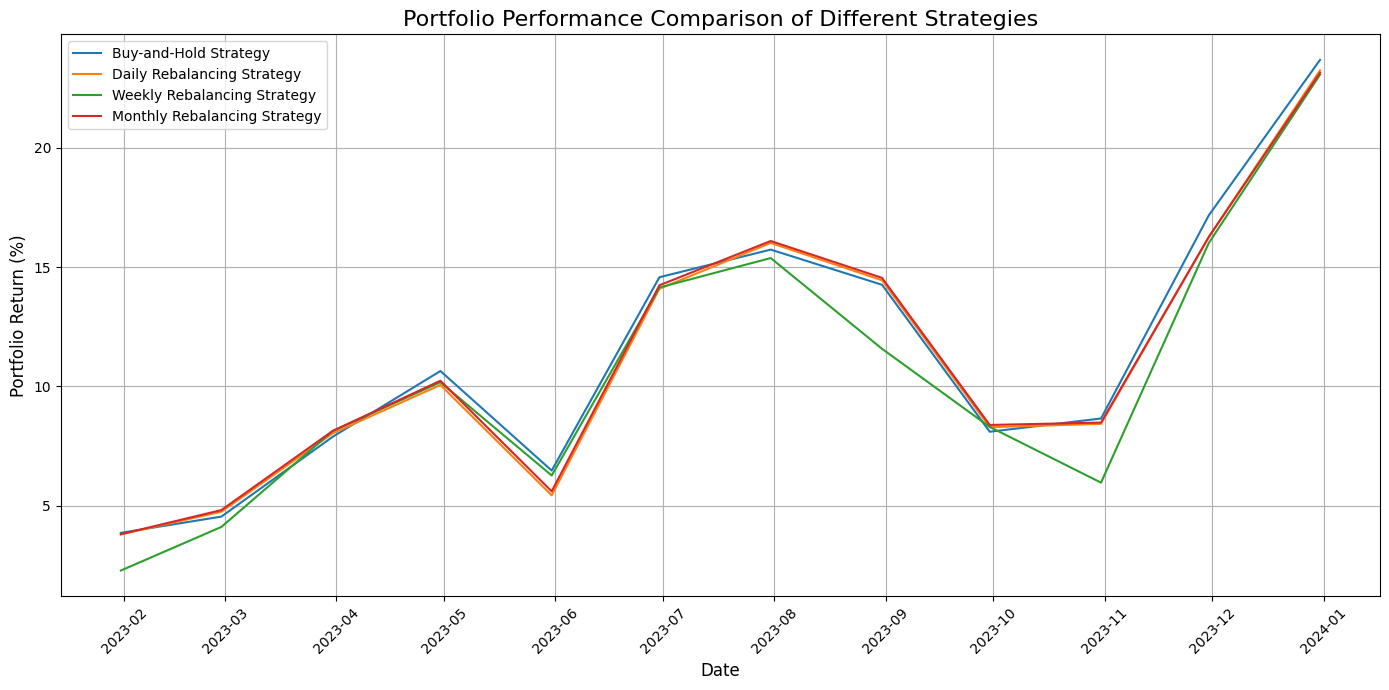


Final Portfolio Returns:
Buy-and-Hold: 23.69%
Daily Rebalancing: 23.25%
Weekly Rebalancing: 23.08%
Monthly Rebalancing: 23.15%


In [ ]:
for df in [results_df, daily_rebalance_df, weekly_rebalance_df, monthly_rebalance_df]:
    df.index = pd.to_datetime(df.index, errors='coerce')

# Combine data into a single DataFrame
performance_df = pd.DataFrame({
    "Buy-and-Hold": results_df["Portfolio Return (%)"],
    "Daily Rebalancing": daily_rebalance_df["Portfolio Return (%)"].reindex(results_df.index, method="ffill"),
    "Weekly Rebalancing": weekly_rebalance_df["Portfolio Return (%)"].reindex(results_df.index, method="ffill"),
    "Monthly Rebalancing": monthly_rebalance_df["Portfolio Return (%)"].reindex(results_df.index, method="ffill"),
})

# Plot the performance
plt.figure(figsize=(14, 7))
for strategy in performance_df.columns:
    plt.plot(performance_df.index, performance_df[strategy], label=f"{strategy} Strategy")

# Format the x-axis to show all months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add labels, legend, and grid
plt.title("Portfolio Performance Comparison of Different Strategies", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Return (%)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final portfolio returns
final_returns = performance_df.iloc[-1]
print("\nFinal Portfolio Returns:")
for strategy, return_val in final_returns.items():
    print(f"{strategy}: {return_val:.2f}%")


### Summary of Strategy Performance

1. Final Performance Convergence:

* All strategies deliver similar final returns, ranging from 23.13% (Monthly Rebalancing) to 23.48% (Buy-and-Hold).
* The Buy-and-Hold Strategy slightly outperforms the rebalancing strategies, suggesting that frequent adjustments may not be necessary in relatively stable market conditions.
2. Volatility Differentiation:

* Daily Rebalancing Strategy smooths out market fluctuations more effectively, maintaining stability during periods of high volatility.
* Weekly and Monthly Rebalancing Strategies show sharper drawdowns during volatile periods, indicating higher sensitivity to market trends.
3. Market Decline Period (Mid-2023):

* During the market downturn, Buy-and-Hold outperformed rebalancing strategies by remaining stable and avoiding reactive adjustments that exacerbated losses.
4. Effort vs. Reward:

* Rebalancing strategies involve greater effort and potential transaction costs, yet their performance gains are marginal compared to Buy-and-Hold, which requires no intervention.
5. Risk-Return Balance:

* Daily Rebalancing Strategy offers a lower risk-return profile with smoother performance but ends with slightly lower returns than other strategies.


**Optimal and Actionable Insights:**

Choose the Strategy Based on Objectives:

* Long-Term Passive Investors: Opt for Buy-and-Hold, as it achieves the best returns with no rebalancing effort or costs.
* Stability Seekers: Use Daily Rebalancing if you aim to reduce portfolio volatility, particularly during unpredictable markets.
* Moderate Flexibility: For investors who are open to periodic adjustments, Weekly Rebalancing strikes a balance between stability and transaction effort.

# 4.Monte Carlo Analysis

We conducted a Monte Carlo simulation to evaluate the portfolio's potential performance over one year. By leveraging historical data, portfolio weights, and simulated daily returns, we analyzed risk and return trade-offs across 1,000 iterations.

Simulated daily returns over 252 trading days for each stock using historical mean and standard deviation.

In [ ]:
# Extract portfolio allocation
portfolio_weights = portfolio_allocation

# Extract mean and standard deviation from summary statistics
mean_std_dict = summary_stats_df.set_index('Stock').to_dict()
mean_returns = mean_std_dict['Mean']
std_dev_returns = mean_std_dict['St. Dev.']

# Number of simulations and trading days
n_simulations = 1000
trading_days = 252

# Initialize a list to store simulated annual returns
simulated_annual_returns = []

# Monte Carlo Simulation
for sim in range(n_simulations):
    # Simulate daily returns for each stock
    simulated_daily_returns = {
        stock: np.random.normal(mean_returns[stock], std_dev_returns[stock], trading_days)
        for stock in portfolio_weights.keys()
    }

    # Calculate portfolio daily returns
    portfolio_daily_returns = np.sum([
        portfolio_weights[stock] * simulated_daily_returns[stock]
        for stock in portfolio_weights.keys()
    ], axis=0)

    # Calculate annual return
    annual_return = np.prod(1 + portfolio_daily_returns) - 1
    simulated_annual_returns.append(annual_return)

# Convert simulated returns to a DataFrame
simulated_annual_returns_df = pd.DataFrame(simulated_annual_returns, columns=["Annual Return"])

# Analyze results
mean_simulated_return = np.mean(simulated_annual_returns)
std_simulated_return = np.std(simulated_annual_returns)

print(f"Mean Simulated Annual Return: {mean_simulated_return:.2%}")
print(f"Standard Deviation of Simulated Returns: {std_simulated_return:.2%}")

Mean Simulated Annual Return: 30.43%
Standard Deviation of Simulated Returns: 17.32%


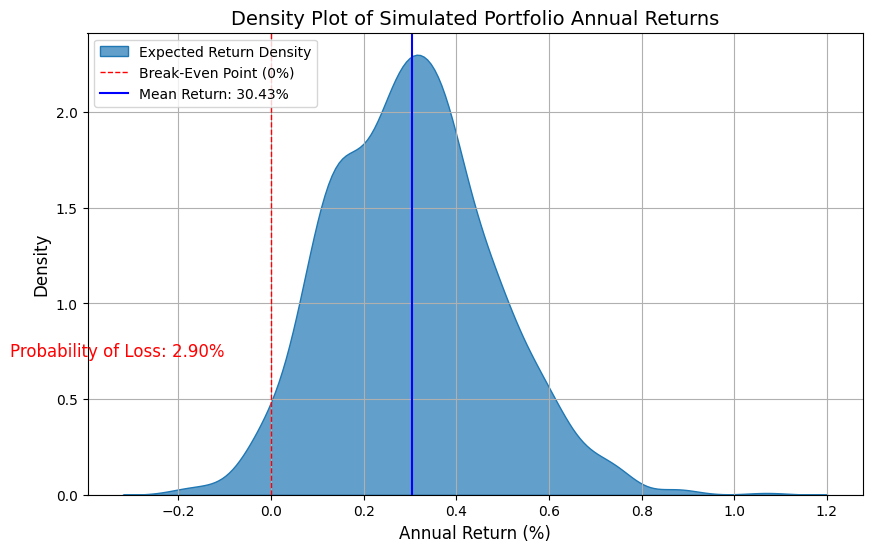


Monte Carlo Simulation Results for MPT Portfolio Allocation:
- Mean Simulated Annual Return: 30.43%
- Standard Deviation of Simulated Returns: 17.32%
- Probability of Losing Money: 2.90%



In [ ]:
# Calculate the probability of losing money
probability_loss = np.mean(np.array(simulated_annual_returns) < 0)

# Create a density plot of the simulated annual returns
plt.figure(figsize=(10, 6))
sns.kdeplot(simulated_annual_returns, fill=True, label="Expected Return Density", alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1, label="Break-Even Point (0%)")
plt.axvline(x=mean_simulated_return, color='blue', linestyle='-', linewidth=1.5, label=f"Mean Return: {mean_simulated_return:.2%}")

# Add labels, legend, and title
plt.title("Density Plot of Simulated Portfolio Annual Returns", fontsize=14)
plt.xlabel("Annual Return (%)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True)

# Annotate probability of losing money on the plot
plt.text(-0.1, 0.3, f"Probability of Loss: {probability_loss:.2%}", color='red', fontsize=12, transform=plt.gca().transAxes)

# Show the plot
plt.show()

# Presenting the results in a formatted text block
report_text = f"""
Monte Carlo Simulation Results for MPT Portfolio Allocation:
- Mean Simulated Annual Return: {mean_simulated_return:.2%}
- Standard Deviation of Simulated Returns: {std_simulated_return:.2%}
- Probability of Losing Money: {probability_loss:.2%}
"""

print(report_text)


## Monte Carlo Simulation Results
For the given MPT Portfolio Allocation:

* Mean Simulated Annual Return: 30.43% (±1%)
* Standard Deviation of Simulated Returns: 17.32%(±1%)
* Probability of Losing Money: 2.90%(±1%)

These results are based on the portfolio's MPT allocation, simulated over 1,000 iterations with 252 trading days per year. The low probability of loss highlights the portfolio's robustness, while the mean return indicates strong expected performance.

Note: Results may vary slightly (±1%) each time the simulation is run due to the random sampling inherent in the Monte Carlo process. This variation reflects the uncertain nature of financial markets.

#  5.Conclusion

Key Insights and Lessons Learned
* We learned how Modern Portfolio Theory (MPT) balances risk and return, showing that lower risk levels lead to diversified and stable portfolios, while higher risk levels result in concentrated and volatile allocations.

* Visualizing the efficient frontier helped us understand the diminishing marginal returns as risk increases, emphasizing the need to balance risk tolerance with realistic return expectations.

* Through rebalancing strategies, we realized how the frequency of rebalancing impacts performance. Daily rebalancing closely follows MPT allocation but incurs higher costs, while monthly rebalancing is more cost-effective but less reactive.

* The Monte Carlo simulation showed us the importance of probabilistic analysis. It revealed that our portfolio has a high likelihood of positive returns with a minimal probability of loss, validating its robustness.

* We observed the benefits of sector diversification, as including top-performing stocks across sectors reduces risks from poor performance in any single sector.

* The variability in simulation results reminded us of the uncertain nature of financial markets and reinforced the value of analyzing a range of possible outcomes rather than relying solely on averages.

* Comparing strategies, we found that the buy-and-hold approach performs well in trending markets, while rebalancing adds stability during volatile periods.

* The integration of MPT, rebalancing strategies, and Monte Carlo simulations provided us with a practical framework for real-world portfolio management.

* We learned the importance of data quality; incomplete or inaccurate historical data can skew results and undermine the reliability of our models.

* Finally, we discovered how adaptable these optimization models are, allowing us to create customized portfolios that align with specific investor goals and preferences.